# IMPORT LIBRARY

In [ ]:
# !pip install hmmlearn
# !pip install hmm
# !pip install --upgrade --user hmmlearn

In [ ]:
import pandas as pd
import numpy as np
import os

# vitualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler,LabelEncoder

# train model Convulutional Neural Network
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D,Activation,MaxPooling1D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
# import tensorflow.keras.layers as L

from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import itertools

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,plot_confusion_matrix
from keras.layers import LSTM, GRU
from tensorflow import keras
# rnn
from keras.layers import SimpleRNN

# skip warning
import warnings
warnings.filterwarnings( action= 'ignore')


# train machine learning classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from datetime import datetime


from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from tensorflow.keras.utils import plot_model


# IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crema_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/crema_d_dataset'
ravdess_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/ravdess_dataset'
savee_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/savee_dataset'
tess_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/tess_dataset'


# PRE PROCESSING RAVDESS

In [ ]:
def dataset_ravdess(location_directory):
  # location_directory = ravdess_directory
  list_name_file = []
  list_modality = []
  list_vocal_channel = []
  list_emotion = []
  list_intensity = []
  list_statement = []
  list_repetition = []
  list_sex_type = []

  for i in range(len(os.listdir(location_directory))):
    each_directory = location_directory + '/' +os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:
      for j in range(len(os.listdir(each_directory))):
        # name_file
        name_file = os.listdir(each_directory)[j]
        # modality
        modality = name_file.split('.')[0].split('-')[0]
        if modality == '01':
          list_modality.append('full-AV')
        elif modality == '02':
          list_modality.append('video-only')
        elif modality == '03': 
          list_modality.append('audio-only')
        # vocal_channel      
        vocal_channel = name_file.split('.')[0].split('-')[1]
        if vocal_channel == '01':
          list_vocal_channel.append('speech')
        elif vocal_channel == '02':
          list_vocal_channel.append('song')
        # emotion
        emotion = name_file.split('.')[0].split('-')[2]
        if emotion == '01':
          list_emotion.append('neutral')
        elif emotion == '02':
          list_emotion.append('neutral') #calm but change to neutral
        elif emotion == '03':
          list_emotion.append('happy')
        elif emotion == '04':
          list_emotion.append('sad')
        elif emotion == '05':
          list_emotion.append('angry')
        elif emotion == '06':
          list_emotion.append('fear')
        elif emotion == '07':
          list_emotion.append('disgust')
        elif emotion == '08':
          list_emotion.append('surprise')
        # intensity
        intensity = name_file.split('.')[0].split('-')[3]
        if intensity == '01':
          list_intensity.append('normal')
        elif intensity == '02':
          list_intensity.append('strong')
        statement = name_file.split('.')[0].split('-')[4]
        if statement == '01':
          list_statement.append('Kids are talking by the door')
        elif statement == '02':
          list_statement.append('Dogs are sitting by the door')
        # repetition
        repetition = name_file.split('.')[0].split('-')[5]
        if repetition == '01':
          list_repetition.append('1st repetition')
        elif repetition == '02':
          list_repetition.append('2nd repetition')
        # actor
        actor = name_file.split('.')[0].split('-')[6]
        if int(actor) % 2 == 0:
          list_sex_type.append('female')
        else:
          list_sex_type.append('male')
        list_name_file.append(location_directory + '/Actor_' + actor + '/' + name_file)
    
  df = pd.DataFrame({
      'name_file':list_name_file,
      'modality':list_modality,
      'vocal_channel':list_vocal_channel,
      'emotion':list_emotion,
      'intensity':list_intensity,
      'statement':list_statement,
      'repetition':list_repetition,
      'sex_type':list_sex_type,
  })
  return df
df_ravdess = dataset_ravdess(ravdess_directory)
df_ravdess

,name_file,modality,vocal_channel,emotion,intensity,statement,repetition,sex_type
0,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,neutral,strong,Kids are talking by the door,2nd repetition,female
1,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,sad,strong,Dogs are sitting by the door,2nd repetition,female
2,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,sad,normal,Dogs are sitting by the door,2nd repetition,female
3,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,happy,strong,Dogs are sitting by the door,1st repetition,female
4,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,neutral,strong,Dogs are sitting by the door,2nd repetition,female
...,...,...,...,...,...,...,...,...
1435,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,surprise,strong,Kids are talking by the door,1st repetition,female
1436,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,fear,strong,Kids are talking by the door,2nd repetition,female
1437,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,disgust,strong,Kids are talking by the door,1st repetition,female
1438,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,surprise,normal,Dogs are sitting by the door,2nd repetition,female


In [ ]:
df_ravdess['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/ravdess_dataset/Actor_08/03-01-02-02-01-02-08.wav'

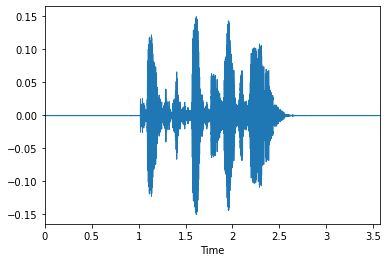

In [ ]:
path_file_sound = df_ravdess['name_file'][100]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# PRE PROCESSING CREMA

In [ ]:
def dataset_crema(location_directory):
  # location_directory = crema_directory
  list_sex_type = []
  list_statement = []
  list_emotion = []
  list_intensity = []
  list_name_file = []

  female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
  for i in range(len(os.listdir(location_directory))):
    print(i)
    each_directory = os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:
      list_name_file.append(location_directory + '/' + each_directory)
      # print(each_directory.split('.wav')[0].split('_'))
      sex_type = each_directory.split('.wav')[0].split('_')[0]
      statement = each_directory.split('.wav')[0].split('_')[1]
      emotion = each_directory.split('.wav')[0].split('_')[2]
      intensity = each_directory.split('.wav')[0].split('_')[3]
      # sex_type
      if int(sex_type) in female:
        list_sex_type.append('female')
      else:
        list_sex_type.append('male')
      # statement
      if statement == 'IEO':
        list_statement.append("It's eleven o'clock")
      elif statement == 'TIE':
        list_statement.append("That is exactly what happened")
      elif statement == 'IOM':
        list_statement.append("I'm on my way to the meeting")
      elif statement == 'IWW':
        list_statement.append("I wonder what this is about")
      elif statement == 'TAI':
        list_statement.append("The airplane is almost full")
      elif statement == 'MTI':
        list_statement.append("Maybe tomorrow it will be cold")
      elif statement == 'IWL':
        list_statement.append("I would like a new alarm clock")
      elif statement == 'ITH':
        list_statement.append("I think I have a doctor's appointment")
      elif statement == 'DFA':
        list_statement.append("Don't forget a jacket")
      elif statement == 'ITS':
        list_statement.append("I think I've seen this before")
      elif statement == 'TSI':
        list_statement.append("The surface is slick")
      elif statement == 'WSI':
        list_statement.append("We'll stop in a couple of minutes")
      # emotion
      if emotion == 'ANG':
        list_emotion.append("angry")
      elif emotion == 'DIS':
        list_emotion.append("disgust")
      elif emotion == 'FEA':
        list_emotion.append("fear")
      elif emotion == 'HAP':
        list_emotion.append("happy")
      elif emotion == 'NEU':
        list_emotion.append("neutral")
      elif emotion == 'SAD':
        list_emotion.append("sad")
      # intensity
      if intensity == 'LO':
        list_intensity.append("low")
      elif intensity == 'MD':
        list_intensity.append("medium")
      elif intensity == 'HI':
        list_intensity.append("high")
      elif intensity == 'XX':
        list_intensity.append("unspecified")
      else:
        list_intensity.append("unspecified")

  # print(len(list_name_file),len(list_emotion),len(list_intensity),len(list_sex_type))
  df = pd.DataFrame({
      'name_file':list_name_file,
      'emotion':list_emotion,
      'intensity':list_intensity,
      'statement':list_statement,
      'sex_type':list_sex_type,
  })
  return df

df_crema = dataset_crema(crema_directory)
df_crema

Streaming output truncated to the last 5000 lines.
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631

,name_file,emotion,intensity,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,disgust,unspecified,The surface is slick,female
1,/content/drive/MyDrive/essex_university/disser...,angry,unspecified,That is exactly what happened,female
2,/content/drive/MyDrive/essex_university/disser...,disgust,unspecified,That is exactly what happened,female
3,/content/drive/MyDrive/essex_university/disser...,fear,unspecified,That is exactly what happened,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,unspecified,The surface is slick,female
...,...,...,...,...,...
7437,/content/drive/MyDrive/essex_university/disser...,neutral,unspecified,I'm on my way to the meeting,female
7438,/content/drive/MyDrive/essex_university/disser...,neutral,unspecified,It's eleven o'clock,female
7439,/content/drive/MyDrive/essex_university/disser...,sad,unspecified,I think I've seen this before,female
7440,/content/drive/MyDrive/essex_university/disser...,fear,unspecified,I think I have a doctor's appointment,female


In [ ]:
df_crema['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/crema_d_dataset/1079_TSI_DIS_XX.wav'

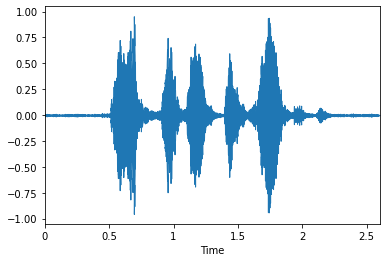

In [ ]:
path_file_sound = df_crema['name_file'][5]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# PRE PROCESSING SAVEE

In [ ]:
def dataset_savee(location_directory):
  # location_directory = savee_directory
  list_name_file = []
  list_emotion = []
  list_sex_type = []

  for i in range(len(os.listdir(location_directory))):
    each_directory = os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:
      # name_file
      list_name_file.append(location_directory + '/' + each_directory)
      # sex_type
      list_sex_type.append('male')
      # emotion
      if '_a' in each_directory:
        list_emotion.append('angry')
      elif '_d' in each_directory:
        list_emotion.append('disgust')
      elif '_f' in each_directory:
        list_emotion.append('fear')
      elif '_h' in each_directory:
        list_emotion.append('happy')
      elif '_n' in each_directory:
        list_emotion.append('neutral')
      elif '_sa' in each_directory:
        list_emotion.append('sad')
      elif '_su' in each_directory:
        list_emotion.append('surprise')
  df = pd.DataFrame({
      'name_file':list_name_file,
      'emotion':list_emotion,
      'sex_type':list_sex_type,
  })
  return df
df_savee = dataset_savee(savee_directory)
df_savee

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,angry,male
1,/content/drive/MyDrive/essex_university/disser...,angry,male
2,/content/drive/MyDrive/essex_university/disser...,angry,male
3,/content/drive/MyDrive/essex_university/disser...,angry,male
4,/content/drive/MyDrive/essex_university/disser...,angry,male
...,...,...,...
475,/content/drive/MyDrive/essex_university/disser...,sad,male
476,/content/drive/MyDrive/essex_university/disser...,sad,male
477,/content/drive/MyDrive/essex_university/disser...,neutral,male
478,/content/drive/MyDrive/essex_university/disser...,neutral,male


In [ ]:
df_savee['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/savee_dataset/DC_a01.wav'

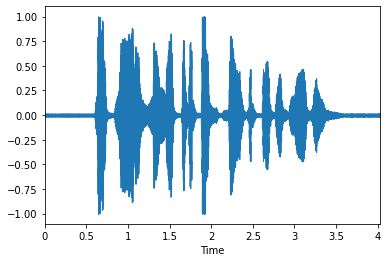

In [ ]:
path_file_sound = df_savee['name_file'][5]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# PRE PROCESSING TESS

In [ ]:
def dataset_tess(location_directory):
  list_name_file = []
  list_emotion = []
  list_statement = []
  list_sex_type = []
  # location_directory = tess_directory
  for i in range(len(os.listdir(location_directory))):
    each_directory = os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:

      all_file = location_directory + '/' +  each_directory
      for j in range(len(os.listdir(all_file))):
        # sex_type
        list_sex_type.append('female')
        # emotion
        if each_directory == 'OAF_angry' or each_directory == 'YAF_angry':
            list_emotion.append('angry')
        elif each_directory == 'OAF_disgust' or each_directory == 'YAF_disgust':
            list_emotion.append('disgust')
        elif each_directory == 'OAF_Fear' or each_directory == 'YAF_fear':
            list_emotion.append('fear')
        elif each_directory == 'OAF_happy' or each_directory == 'YAF_happy':
            list_emotion.append('happy')
        elif each_directory == 'OAF_neutral' or each_directory == 'YAF_neutral':
            list_emotion.append('neutral')                                
        elif each_directory == 'OAF_Pleasant_surprise' or each_directory == 'YAF_pleasant_surprised':
            list_emotion.append('surprise')               
        elif each_directory == 'OAF_Sad' or each_directory == 'YAF_sad':
            list_emotion.append('sad')
        each_file = os.listdir(all_file)[j]
        # statement
        list_statement.append(each_file.split('_')[1])
        # name_file
        list_name_file.append(tess_directory + '/' + each_directory + '/' + each_file)
  df = pd.DataFrame({
      'name_file':list_name_file,
      'emotion':list_emotion,
      'statement':list_statement,
      'sex_type':list_sex_type,
  })
  return df
df_tess = dataset_tess(tess_directory)
df_tess


,name_file,emotion,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,fear,bar,female
1,/content/drive/MyDrive/essex_university/disser...,fear,back,female
2,/content/drive/MyDrive/essex_university/disser...,fear,base,female
3,/content/drive/MyDrive/essex_university/disser...,fear,beg,female
4,/content/drive/MyDrive/essex_university/disser...,fear,bean,female
...,...,...,...,...
2795,/content/drive/MyDrive/essex_university/disser...,disgust,youth,female
2796,/content/drive/MyDrive/essex_university/disser...,disgust,wire,female
2797,/content/drive/MyDrive/essex_university/disser...,disgust,witch,female
2798,/content/drive/MyDrive/essex_university/disser...,disgust,young,female


In [ ]:
df_tess['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/tess_dataset/OAF_Fear/OAF_bar_fear.wav'

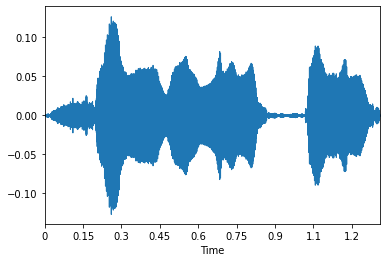

In [ ]:
path_file_sound = df_tess['name_file'][5]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# Combine Data

In [ ]:
df_ravdess.head(2)

,name_file,modality,vocal_channel,emotion,intensity,statement,repetition,sex_type
0,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,neutral,strong,Kids are talking by the door,2nd repetition,female
1,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,sad,strong,Dogs are sitting by the door,2nd repetition,female


In [ ]:
df_crema.head(2)

,name_file,emotion,intensity,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,disgust,unspecified,The surface is slick,female
1,/content/drive/MyDrive/essex_university/disser...,angry,unspecified,That is exactly what happened,female


In [ ]:
df_savee.head(2)

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,angry,male
1,/content/drive/MyDrive/essex_university/disser...,angry,male


In [ ]:
df_tess.head(2)

,name_file,emotion,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,fear,bar,female
1,/content/drive/MyDrive/essex_university/disser...,fear,back,female


In [ ]:
# df_ravdess[['name_file','emotion','sex_type']]
# df_crema[['name_file','emotion','sex_type']]
# df_savee[['name_file','emotion','sex_type']]
# df_tess[['name_file','emotion','sex_type']]
df = pd.concat([df_ravdess[['name_file','emotion','sex_type']], df_crema[['name_file','emotion','sex_type']], df_savee[['name_file','emotion','sex_type']], df_tess[['name_file','emotion','sex_type']]], axis = 0)
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
2795,/content/drive/MyDrive/essex_university/disser...,disgust,female
2796,/content/drive/MyDrive/essex_university/disser...,disgust,female
2797,/content/drive/MyDrive/essex_university/disser...,disgust,female
2798,/content/drive/MyDrive/essex_university/disser...,disgust,female


In [ ]:
df['emotion'].value_counts()

sad         1923
happy       1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: emotion, dtype: int64

In [ ]:
df['sex_type'].value_counts()

female    7032
male      5130
Name: sex_type, dtype: int64

In [ ]:
df['name_file']

0       /content/drive/MyDrive/essex_university/disser...
1       /content/drive/MyDrive/essex_university/disser...
2       /content/drive/MyDrive/essex_university/disser...
3       /content/drive/MyDrive/essex_university/disser...
4       /content/drive/MyDrive/essex_university/disser...
                              ...                        
2795    /content/drive/MyDrive/essex_university/disser...
2796    /content/drive/MyDrive/essex_university/disser...
2797    /content/drive/MyDrive/essex_university/disser...
2798    /content/drive/MyDrive/essex_university/disser...
2799    /content/drive/MyDrive/essex_university/disser...
Name: name_file, Length: 12162, dtype: object

we combine 4 datasets to have enough data for train data and protect overfitting!!!!

# check point one

In [ ]:
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
2795,/content/drive/MyDrive/essex_university/disser...,disgust,female
2796,/content/drive/MyDrive/essex_university/disser...,disgust,female
2797,/content/drive/MyDrive/essex_university/disser...,disgust,female
2798,/content/drive/MyDrive/essex_university/disser...,disgust,female


In [ ]:
df.to_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v1.csv",index=False)
print("completed")

completed


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v1.csv")
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
12157,/content/drive/MyDrive/essex_university/disser...,disgust,female
12158,/content/drive/MyDrive/essex_university/disser...,disgust,female
12159,/content/drive/MyDrive/essex_university/disser...,disgust,female
12160,/content/drive/MyDrive/essex_university/disser...,disgust,female


# Exploratory Data Analysis

In [ ]:
df_visualization = pd.DataFrame({})
df_visualization['name_file'] = df['name_file'].map(lambda x : x.split('/')[8].split('_')[0])
df_visualization['emotion'] = df['emotion']
df_visualization['sex_type'] = df['sex_type']
df_visualization.info()
df_visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name_file  12162 non-null  object
 1   emotion    12162 non-null  object
 2   sex_type   12162 non-null  object
dtypes: object(3)
memory usage: 285.2+ KB


,name_file,emotion,sex_type
0,ravdess,neutral,female
1,ravdess,sad,female
2,ravdess,sad,female
3,ravdess,happy,female
4,ravdess,neutral,female
...,...,...,...
12157,tess,disgust,female
12158,tess,disgust,female
12159,tess,disgust,female
12160,tess,disgust,female


In [ ]:
print("name_file =",df_visualization['name_file'].unique())
print("emotion =",df_visualization['emotion'].unique())
print("sex_type =",df_visualization['sex_type'].unique())

name_file = ['ravdess' 'crema' 'savee' 'tess']
emotion = ['neutral' 'sad' 'happy' 'angry' 'fear' 'disgust' 'surprise']
sex_type = ['female' 'male']


In [ ]:
all_columns_vir = df_visualization.columns.tolist()

for i in range(len(all_columns_vir)):
  list_unique_each_column = df_visualization[f'{all_columns_vir[i]}'].unique().tolist()
  print("==============================================")
  for j in range(len(list_unique_each_column)):
    len_unique = len(df_visualization[df_visualization[f'{all_columns_vir[i]}'] == list_unique_each_column[j]])
    print(f"column name = {all_columns_vir[i]}, {list_unique_each_column[j]} have",len_unique)


column name = name_file, ravdess have 1440
column name = name_file, crema have 7442
column name = name_file, savee have 480
column name = name_file, tess have 2800
column name = emotion, neutral have 1895
column name = emotion, sad have 1923
column name = emotion, happy have 1923
column name = emotion, angry have 1923
column name = emotion, fear have 1923
column name = emotion, disgust have 1923
column name = emotion, surprise have 652
column name = sex_type, female have 7032
column name = sex_type, male have 5130


In [ ]:
df_visualization = df_visualization.replace(
    {'name_file': {'ravdess': 0, 'crema': 1, 'savee':2, 'tess':3},
     'emotion':{'neutral': 0, 'sad': 1, 'happy':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6},
     'sex_type':{'female': 0, 'male': 1}
})
df_visualization

,name_file,emotion,sex_type
0,0,0,0
1,0,1,0
2,0,1,0
3,0,2,0
4,0,0,0
...,...,...,...
12157,3,5,0
12158,3,5,0
12159,3,5,0
12160,3,5,0


In [ ]:
df_visualization.describe()

,name_file,emotion,sex_type
count,12162.000000,12162.000000,12162.000000
mean,1.381516,2.693389,0.421806
std,0.966070,1.836362,0.493868
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000
75%,2.000000,4.000000,1.000000
max,3.000000,6.000000,1.000000


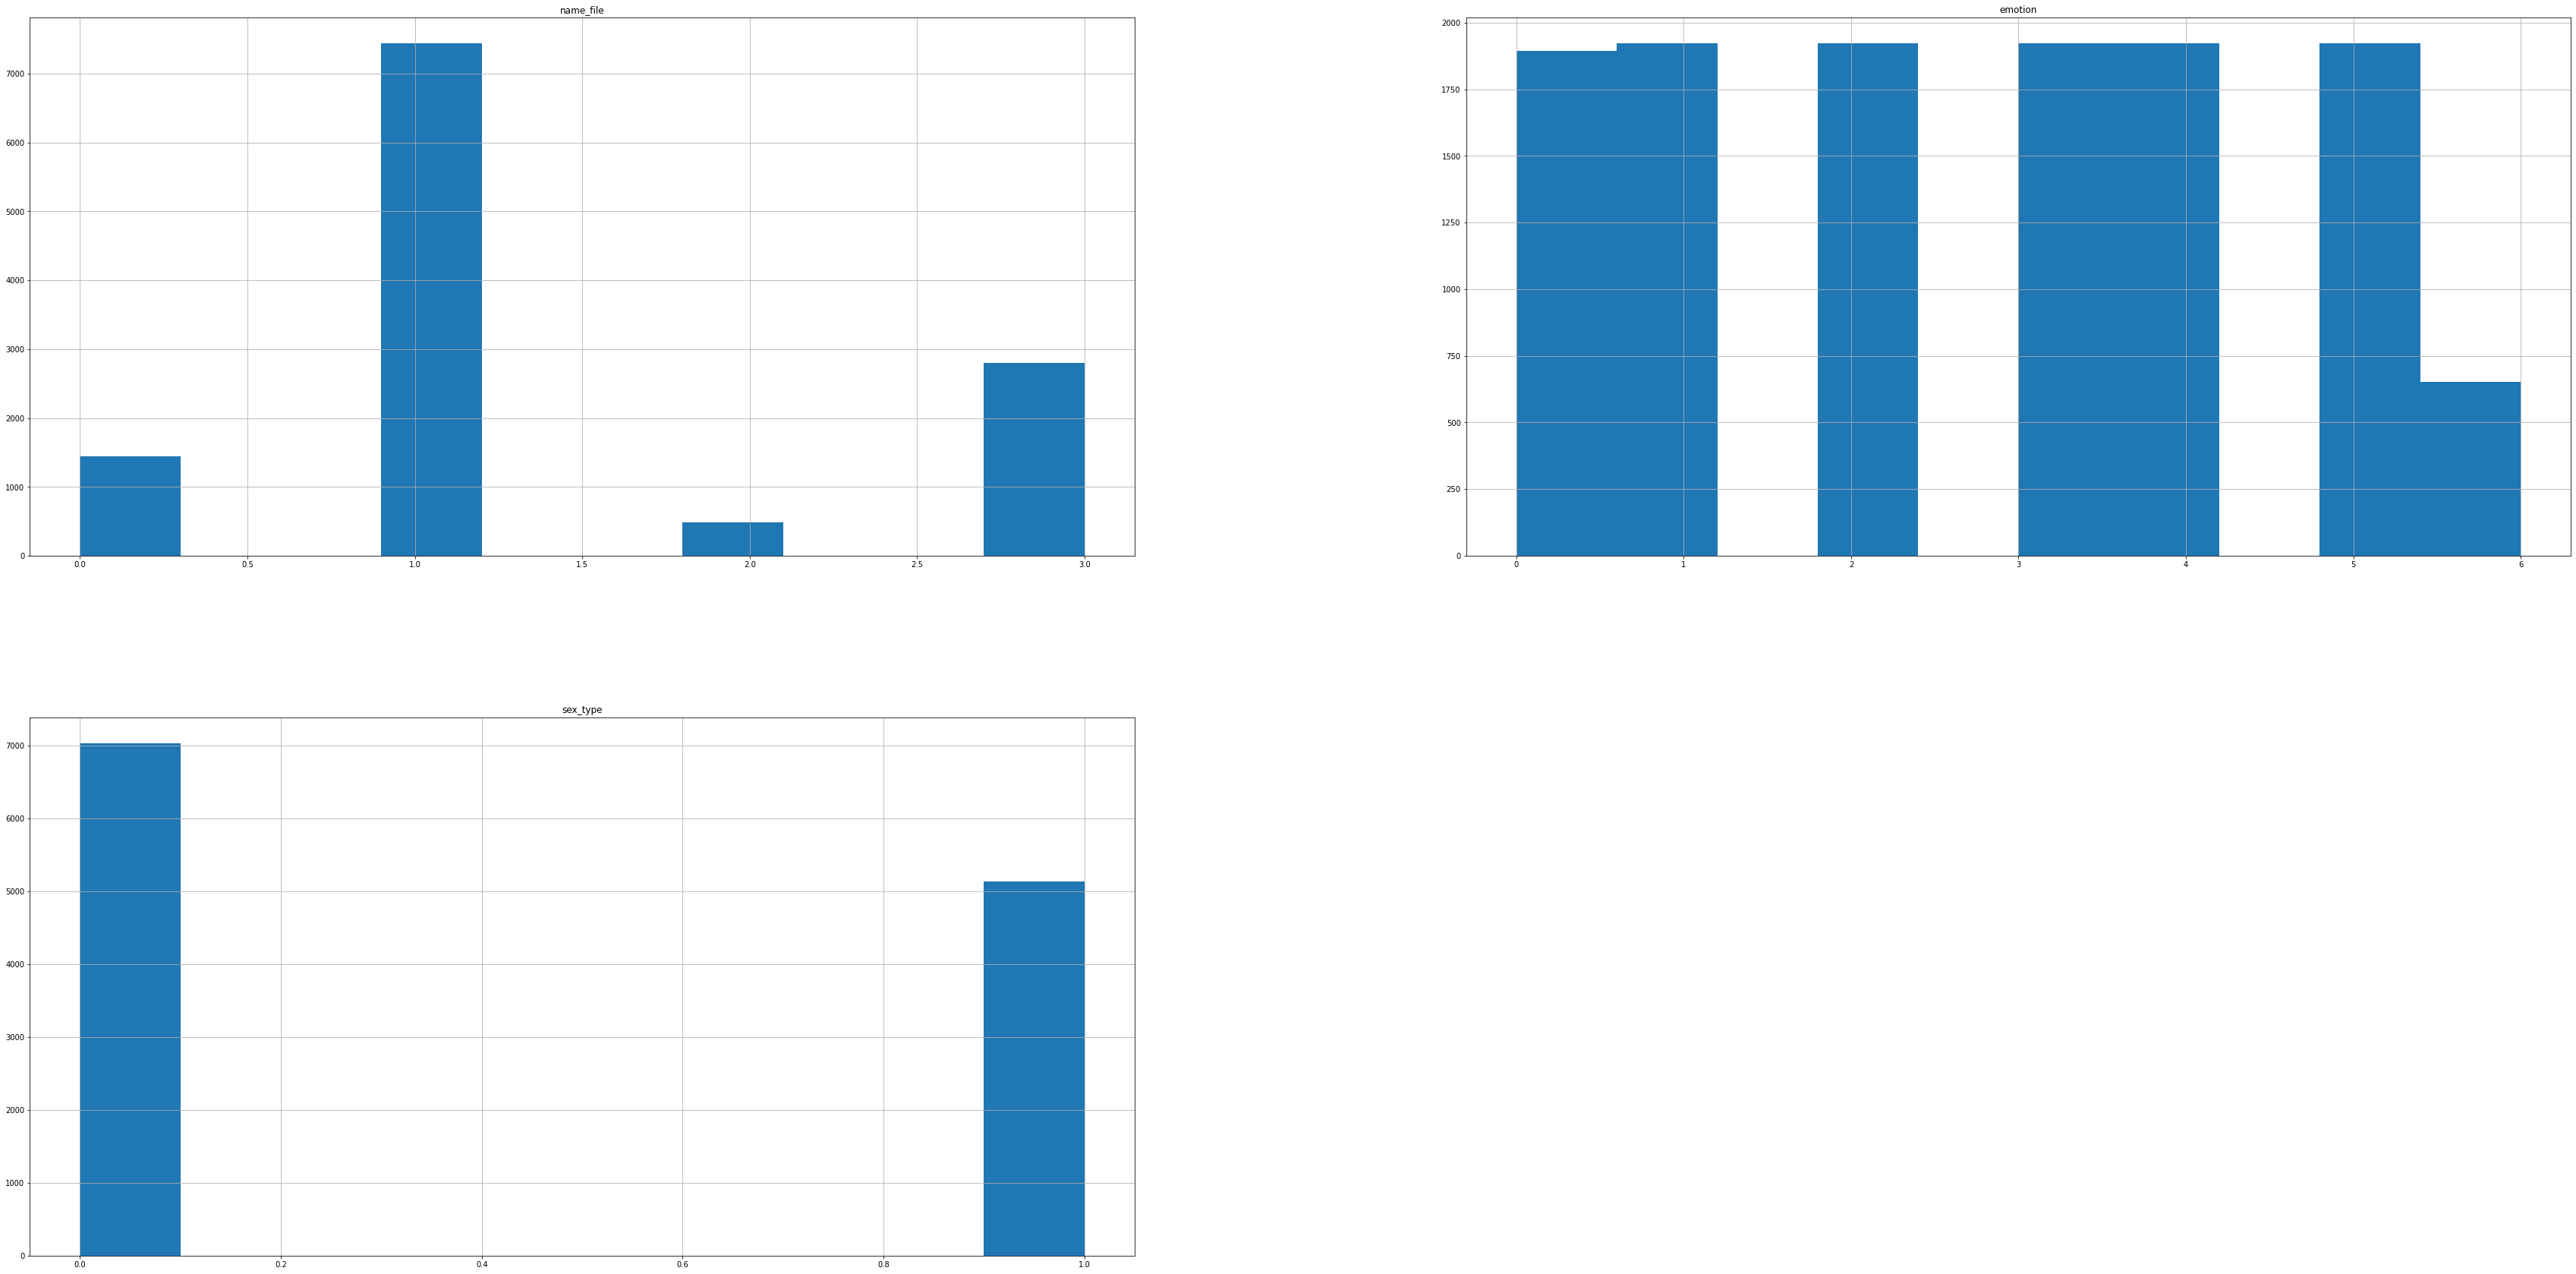

In [ ]:
df_visualization.hist(figsize = (60,30))
plt.show()    

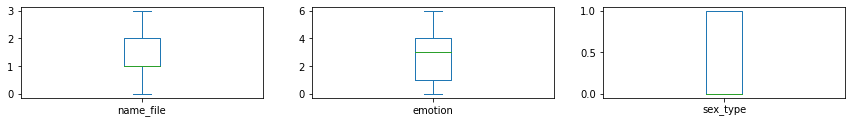

In [ ]:
df_visualization.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

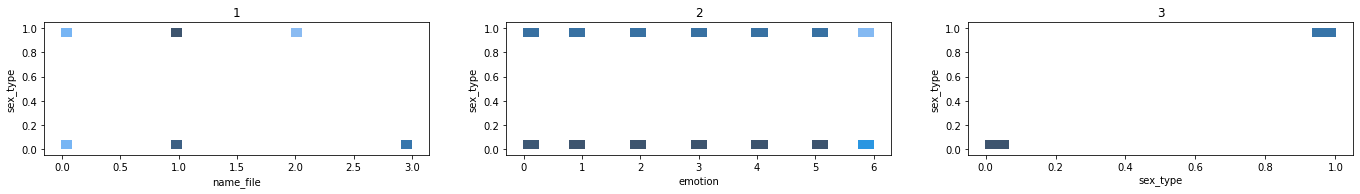

In [ ]:
# compare class column with every column.
plt.figure(figsize=(40,20))

for i, column in enumerate(df_visualization.columns):
  plt.subplot(7,5,i+1)
  sns.histplot(x = df_visualization[column],y= df_visualization['sex_type'])
  plt.title(i+1)
plt.show

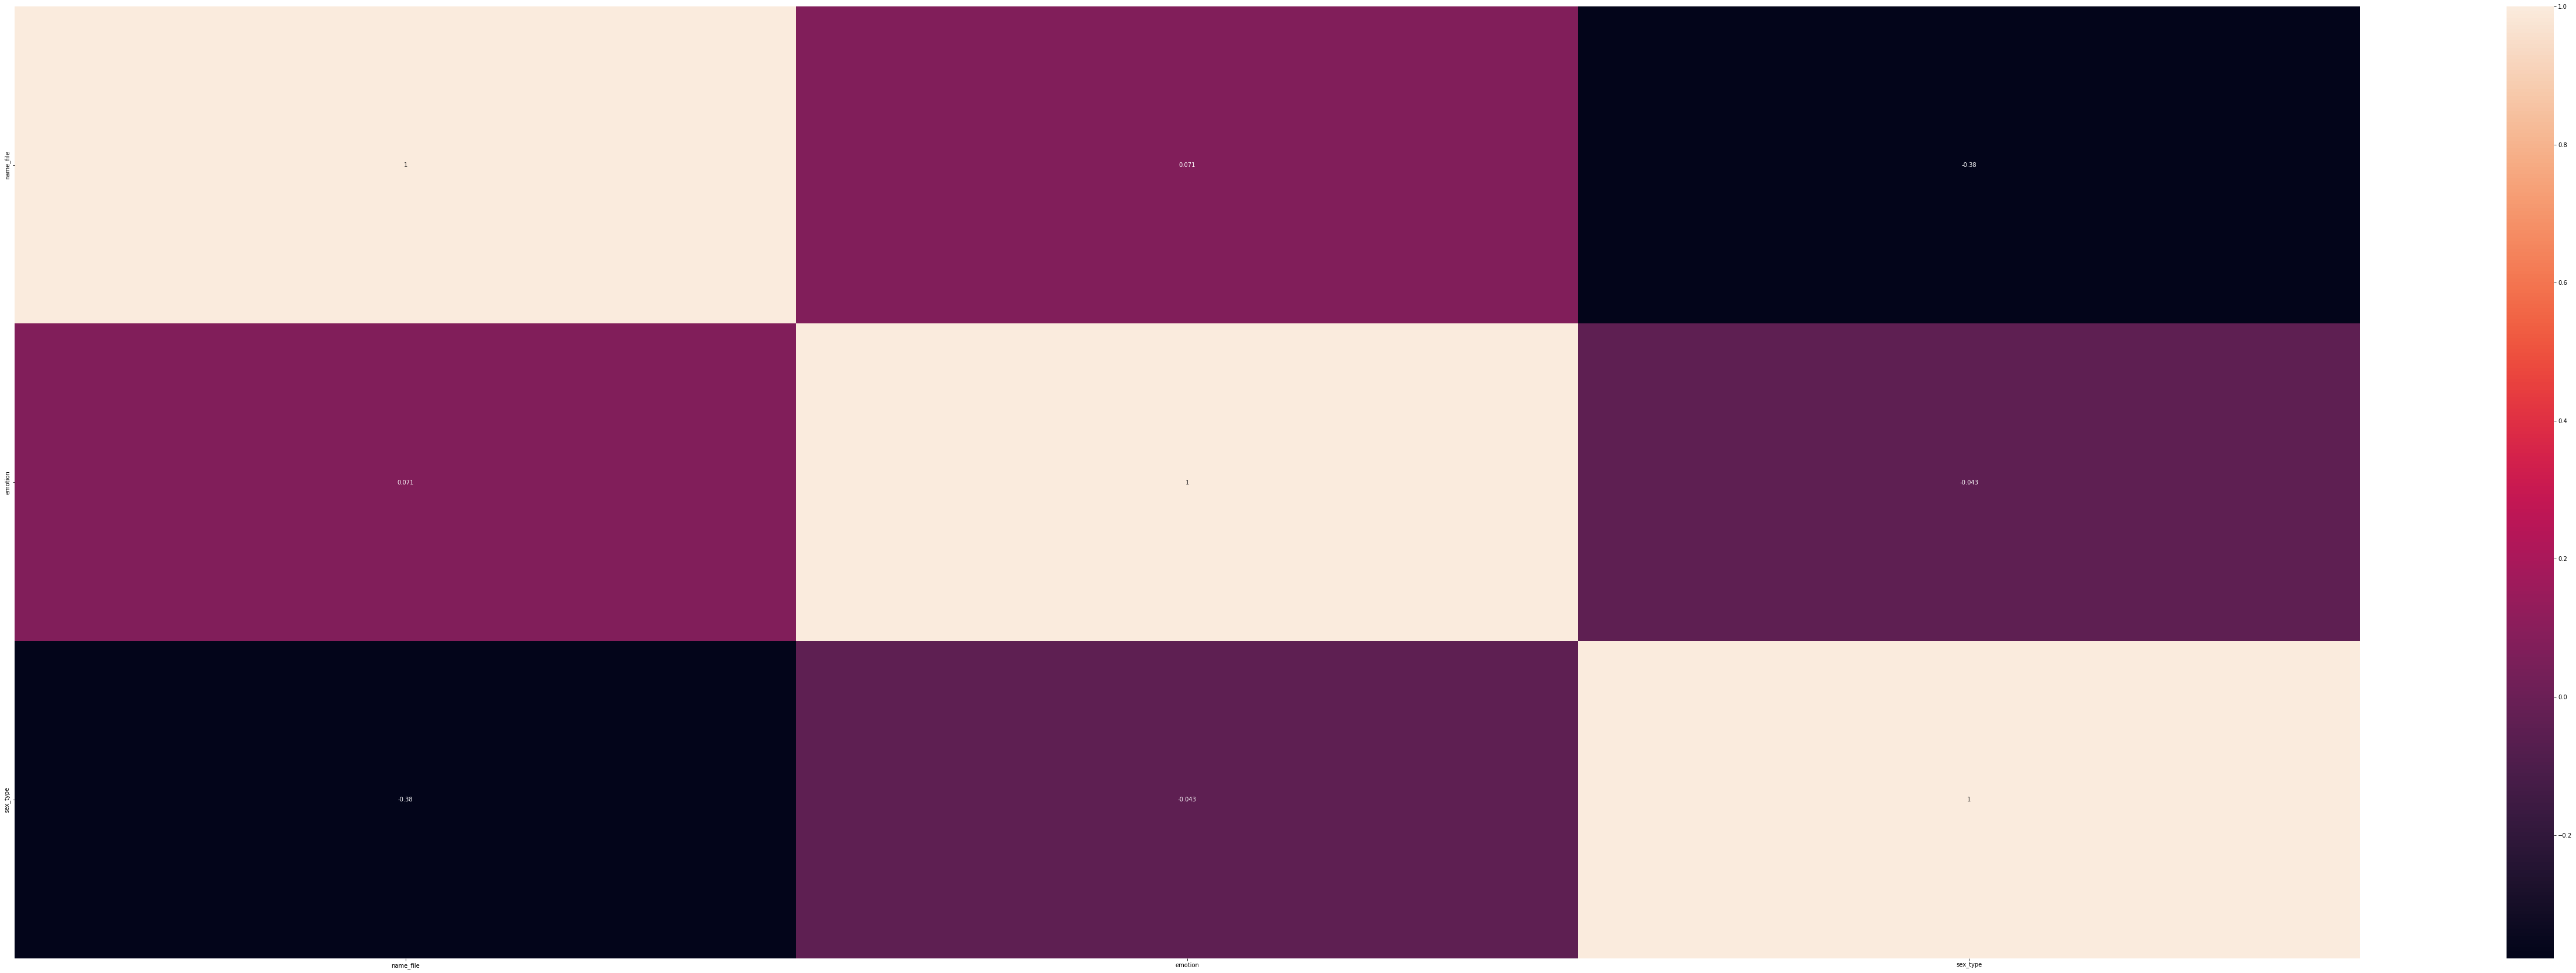

In [ ]:
# we see the correlation of all columns. According to the color scale is between [-1,1].
plt.figure(figsize = (90,30))
data_corr = df_visualization.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=df.columns,annot=True)

# DATA PREPARATION

In [ ]:
del df["sex_type"]
df

,name_file,emotion
0,/content/drive/MyDrive/essex_university/disser...,neutral
1,/content/drive/MyDrive/essex_university/disser...,sad
2,/content/drive/MyDrive/essex_university/disser...,sad
3,/content/drive/MyDrive/essex_university/disser...,happy
4,/content/drive/MyDrive/essex_university/disser...,neutral
...,...,...
12157,/content/drive/MyDrive/essex_university/disser...,disgust
12158,/content/drive/MyDrive/essex_university/disser...,disgust
12159,/content/drive/MyDrive/essex_university/disser...,disgust
12160,/content/drive/MyDrive/essex_university/disser...,disgust


In [ ]:
# df = df[:500]

In [ ]:
df['emotion'].value_counts()

sad         1923
happy       1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: emotion, dtype: int64

# CREATE FUNCTION

In [ ]:
def noise_calculation(data_val):
    threshold_val=0.075
    data_val = data_val + np.random.random() * threshold_val *np.random.uniform()*np.amax(data_val) *np.random.normal(size=data_val.shape[0])
    return data_val

def pitch_calculation(data_val, sampling_rate_val):
    pitch_factor_val=0.7
    return librosa.effects.pitch_shift(data_val, sampling_rate_val, np.random.random() * pitch_factor_val)

In [ ]:
def extract_features_calculation(data_val, sample_rate_val):
    frame_length_val = 2048
    hop_length_val = 512
    flatten_bool = True
    extract_features_numpy = np.array([])
    extract_features_numpy = np.hstack((extract_features_numpy,
        # zero crossing rate
        np.squeeze(librosa.feature.zero_crossing_rate(y=data_val, frame_length=frame_length_val, hop_length=hop_length_val)),
        # rmse
        np.squeeze(librosa.feature.rms(y=data_val, frame_length=frame_length_val, hop_length=hop_length_val)),
        # mfcc
        np.squeeze(librosa.feature.mfcc(y=data_val, sr=sample_rate_val).T) if not flatten_bool else np.ravel(librosa.feature.mfcc(y=data_val, sr=sample_rate_val).T)
    ))
    return extract_features_numpy

In [ ]:
def generate_features(path_file):
    # duration of time
    offset_val=0.6
    duration_val=2.5
    data_val, sample_rate_val = librosa.load(path_file, duration=duration_val, offset=offset_val)

    # extract feature
    extract_features_numpy = extract_features_calculation(data_val, sample_rate_val)
    result_np_ef = np.array(extract_features_numpy)

    # noise data
    noise_data_val = noise_calculation(data_val)
    efc_result = extract_features_calculation(noise_data_val, sample_rate_val)
    result_np_ef = np.vstack((result_np_ef, efc_result))

    # pitching data
    pitch_data_val = pitch_calculation(data_val, sample_rate_val)
    efc_result = extract_features_calculation(pitch_data_val, sample_rate_val)
    result_np_ef = np.vstack((result_np_ef, efc_result))

    # combine pitching data and clean noise data --
    pitch_data_cal = pitch_calculation(data_val, sample_rate_val)
    data_noise_pitch_val = noise_calculation(pitch_data_cal)
    efc_result = extract_features_calculation(data_noise_pitch_val, sample_rate_val)
    result_np_ef = np.vstack((result_np_ef, efc_result))

    return result_np_ef

In [ ]:
list_feature = []
list_label = []
for name_file_record, emotion_record, i in zip(df["name_file"], df["emotion"], range(df["name_file"].shape[0])):
    each_features = generate_features(name_file_record)
    if i % 100 == 0:
        print(f"This is record {i}")
    for j in each_features:
        list_feature.append(j)
        list_label.append(emotion_record)

This is record 0
This is record 100
This is record 200
This is record 300
This is record 400
This is record 500
This is record 600
This is record 700
This is record 800
This is record 900
This is record 1000
This is record 1100
This is record 1200
This is record 1300
This is record 1400
This is record 1500
This is record 1600
This is record 1700
This is record 1800
This is record 1900
This is record 2000
This is record 2100
This is record 2200
This is record 2300
This is record 2400
This is record 2500
This is record 2600
This is record 2700
This is record 2800
This is record 2900
This is record 3000
This is record 3100
This is record 3200
This is record 3300
This is record 3400
This is record 3500
This is record 3600
This is record 3700
This is record 3800
This is record 3900
This is record 4000
This is record 4100
This is record 4200
This is record 4300
This is record 4400
This is record 4500
This is record 4600
This is record 4700
This is record 4800
This is record 4900
This is reco

In [ ]:
df_clean_data = pd.DataFrame(list_feature)
df_clean_data["labels"] = list_label
df_clean_data.to_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v3.csv", index=False)
df_clean_data.head()
print("file upload")

file upload


# check point two

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v3.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48648 entries, 0 to 48647
Columns: 2377 entries, 0 to labels
dtypes: float64(2376), object(1)
memory usage: 882.2+ MB


,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.260742,0.312500,0.312500,0.185059,0.130371,0.191406,0.305176,0.326660,0.319824,0.284180,...,-4.222076,0.154335,-1.792320,1.812561,0.974394,1.651097,9.140385,7.712218,7.271248,neutral
1,0.238281,0.371094,0.499023,0.496094,0.503906,0.484375,0.486816,0.500488,0.491699,0.499023,...,5.901615,4.321806,0.539765,0.202942,0.631489,2.571382,-4.116874,-2.077753,-1.405770,neutral
2,0.093750,0.111328,0.111328,0.049316,0.037598,0.048828,0.094727,0.118652,0.172852,0.228027,...,0.177506,1.242804,-3.911286,-6.002635,-1.506835,4.272758,5.901239,7.326171,9.728956,neutral
3,0.175293,0.233398,0.243164,0.141113,0.082520,0.083984,0.172852,0.235840,0.303711,0.328125,...,-4.463211,0.214644,3.030201,5.680114,2.512926,6.476553,11.664365,8.488498,6.350754,neutral
4,0.136719,0.208008,0.271973,0.267090,0.257324,0.247070,0.251953,0.243164,0.197266,0.179199,...,-4.276752,1.275351,11.402136,6.619304,-6.211828,-7.745015,4.286483,15.148426,14.956486,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.061035,0.076172,0.102539,0.083984,0.082520,0.118652,0.106934,0.100586,0.100586,0.080566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
48644,0.075195,0.095703,0.114258,0.096680,0.079590,0.069824,0.054688,0.041992,0.042969,0.043945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
48645,0.081055,0.103516,0.126953,0.106445,0.097168,0.111816,0.145996,0.167969,0.166016,0.148438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
48646,0.085938,0.140625,0.166992,0.145020,0.132812,0.107422,0.105469,0.102539,0.086426,0.076660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust


In [ ]:
# list_choose_df = []
# df_new = pd.DataFrame({})
# for i in range(len(df)):
#   if df.index[i] % 96 == 0 or df.index[i] % 96 == 1 or df.index[i] % 96 == 2 or df.index[i] % 96 == 3:

#     df_new = pd.concat([df_new, df[i:i+1]])
# df_new = df_new.reset_index()
# del df_new['index']
# df = df_new


In [ ]:
# change nan value to zero
df = df.fillna(0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48648 entries, 0 to 48647
Columns: 2377 entries, 0 to labels
dtypes: float64(2376), object(1)
memory usage: 882.2+ MB


,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.260742,0.312500,0.312500,0.185059,0.130371,0.191406,0.305176,0.326660,0.319824,0.284180,...,-4.222076,0.154335,-1.792320,1.812561,0.974394,1.651097,9.140385,7.712218,7.271248,neutral
1,0.238281,0.371094,0.499023,0.496094,0.503906,0.484375,0.486816,0.500488,0.491699,0.499023,...,5.901615,4.321806,0.539765,0.202942,0.631489,2.571382,-4.116874,-2.077753,-1.405770,neutral
2,0.093750,0.111328,0.111328,0.049316,0.037598,0.048828,0.094727,0.118652,0.172852,0.228027,...,0.177506,1.242804,-3.911286,-6.002635,-1.506835,4.272758,5.901239,7.326171,9.728956,neutral
3,0.175293,0.233398,0.243164,0.141113,0.082520,0.083984,0.172852,0.235840,0.303711,0.328125,...,-4.463211,0.214644,3.030201,5.680114,2.512926,6.476553,11.664365,8.488498,6.350754,neutral
4,0.136719,0.208008,0.271973,0.267090,0.257324,0.247070,0.251953,0.243164,0.197266,0.179199,...,-4.276752,1.275351,11.402136,6.619304,-6.211828,-7.745015,4.286483,15.148426,14.956486,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.061035,0.076172,0.102539,0.083984,0.082520,0.118652,0.106934,0.100586,0.100586,0.080566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust
48644,0.075195,0.095703,0.114258,0.096680,0.079590,0.069824,0.054688,0.041992,0.042969,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust
48645,0.081055,0.103516,0.126953,0.106445,0.097168,0.111816,0.145996,0.167969,0.166016,0.148438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust
48646,0.085938,0.140625,0.166992,0.145020,0.132812,0.107422,0.105469,0.102539,0.086426,0.076660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust


# train_test_split_machine_learning

In [ ]:
# df = df[:100]
X = df.drop(labels="labels", axis=1)
y = df["labels"]

In [ ]:
# label_encoder = LabelEncoder()
# y = np_utils.to_categorical(label_encoder.fit_transform(y))
# y,label_encoder.classes_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=300, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918,), (9730,))

In [ ]:
# standard_scaler = StandardScaler()
# X_train_scalar = standard_scaler.fit_transform(X_train)
# X_test_scalar = standard_scaler.transform(X_test)
# X_train_scalar.shape, X_test_scalar.shape, y_train.shape, y_test.shape

In [ ]:
# X_train_scalar = np.expand_dims(X_train_scalar, axis=2)
# X_test_scalar = np.expand_dims(X_test_scalar, axis=2)
# X_train_scalar.shape,X_test_scalar.shape

In [ ]:
y_train.value_counts()

angry       6193
sad         6179
fear        6176
disgust     6164
happy       6138
neutral     5988
surprise    2080
Name: labels, dtype: int64

In [ ]:
y_test.value_counts()

neutral     1592
happy       1554
disgust     1528
fear        1516
sad         1513
angry       1499
surprise     528
Name: labels, dtype: int64

# Machine Learning

## Decision Tree

### Default Parameter

              precision    recall  f1-score   support

       angry       0.56      0.55      0.56      1499
     disgust       0.47      0.47      0.47      1528
        fear       0.45      0.45      0.45      1516
       happy       0.46      0.46      0.46      1554
     neutral       0.51      0.50      0.50      1592
         sad       0.51      0.53      0.52      1513
    surprise       0.50      0.48      0.49       528

    accuracy                           0.49      9730
   macro avg       0.49      0.49      0.49      9730
weighted avg       0.49      0.49      0.49      9730

accuracy_score_DecisionTreeClassifier(): 0.49260020554984585
accuracy_score_DecisionTreeClassifier(): 0.4860476900999302 +/- 0.009038667515900253
list_cross_validation_DecisionTreeClassifier(): [0.48997945 0.49563207 0.47096608 0.48252826 0.49640288 0.48561151
 0.46916752 0.49409044 0.48959136 0.48650732]


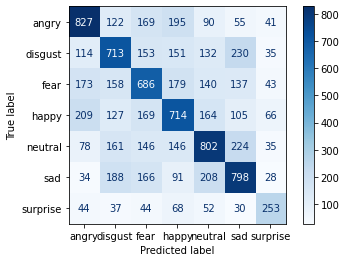

time to finish all process = 0:29:42.859315


In [ ]:
start_time = datetime.now()
model = DecisionTreeClassifier()
scalar_use = StandardScaler()

pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = DecisionTreeClassifier()
params = {
    'clf__criterion': ["gini", "entropy"],
    'clf__splitter': ["best","random"],
    'clf__max_depth': [3,5,None],
    'clf__min_samples_split': [2,4,8],
    'clf__min_samples_leaf': [1,2,4],
    'clf__max_features':['auto','sqrt','log2']
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = GridSearchCV(
  estimator = pipe,
  param_grid= params,
  # n_iter=100,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.5141671415004748
best_params = {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__splitter': 'best'}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy',
                                        max_features='auto',
                                        min_samples_split=4))])
time to finish all process = 0:04:54.134601


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.54      0.55      0.54      1499
     disgust       0.44      0.44      0.44      1528
        fear       0.42      0.44      0.43      1516
       happy       0.45      0.45      0.45      1554
     neutral       0.49      0.47      0.48      1592
         sad       0.49      0.49      0.49      1513
    surprise       0.51      0.47      0.49       528

    accuracy                           0.47      9730
   macro avg       0.48      0.47      0.47      9730
weighted avg       0.47      0.47      0.47      9730

accuracy_score_DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=4): 0.47183967112024666
accuracy_score_DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=4): 0.44758229323579357 +/- 0.007930114846310864
list_cross_validation_DecisionTreeClassifier(criterion='entropy', max_features='auto',
 

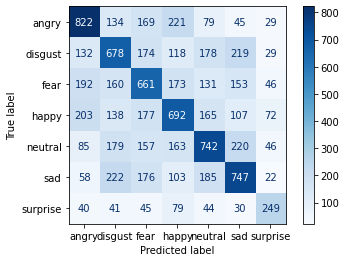

time to finish all process = 0:02:01.873546


In [ ]:
start_time = datetime.now()
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 4, splitter= 'best')
scalar_use = StandardScaler()

pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## LogisticRegression

### Default Parameter

              precision    recall  f1-score   support

       angry       0.48      0.54      0.51      1499
     disgust       0.45      0.44      0.44      1528
        fear       0.38      0.34      0.36      1516
       happy       0.40      0.39      0.39      1554
     neutral       0.42      0.38      0.40      1592
         sad       0.44      0.49      0.46      1513
    surprise       0.50      0.49      0.50       528

    accuracy                           0.43      9730
   macro avg       0.44      0.44      0.44      9730
weighted avg       0.43      0.43      0.43      9730

accuracy_score_LogisticRegression(): 0.4336073997944502
accuracy_score_LogisticRegression(): 0.4315481043956552 +/- 0.007285801166737153
list_cross_validation_LogisticRegression(): [0.42985612 0.43473792 0.43165468 0.42857143 0.44039054 0.4290853
 0.43293936 0.43602261 0.41300437 0.43921871]


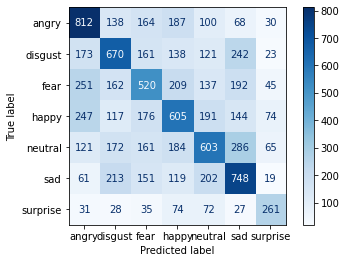

time to finish all process = 0:13:19.701657


In [ ]:
start_time = datetime.now()
model = LogisticRegression()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = LogisticRegression()
params = {
    'clf__penalty': ['l2','none'],
    'clf__dual': [True,False],
    'clf__fit_intercept': [True,False],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__max_iter': [100,200,400,800],
    'clf__multi_class': ['auto','ovr','multinomial'],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8742374169040836
best_params = {'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__multi_class': 'ovr', 'clf__max_iter': 200, 'clf__fit_intercept': True, 'clf__dual': True}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(dual=True, max_iter=200, multi_class='ovr',
                                    solver='liblinear'))])
time to finish all process = 0:29:29.890825


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.46      0.53      0.49      1499
     disgust       0.43      0.45      0.44      1528
        fear       0.38      0.36      0.37      1516
       happy       0.41      0.35      0.38      1554
     neutral       0.41      0.37      0.39      1592
         sad       0.41      0.46      0.43      1513
    surprise       0.58      0.56      0.57       528

    accuracy                           0.43      9730
   macro avg       0.44      0.44      0.44      9730
weighted avg       0.42      0.43      0.42      9730

accuracy_score_LogisticRegression(dual=True, max_iter=200, multi_class='ovr',
                   solver='liblinear'): 0.42589928057553955
accuracy_score_LogisticRegression(dual=True, max_iter=200, multi_class='ovr',
                   solver='liblinear'): 0.42173258419368703 +/- 0.008566634478617472
list_cross_validation_LogisticRegression(dual=True, max_iter=200, multi_class='ovr',
                 

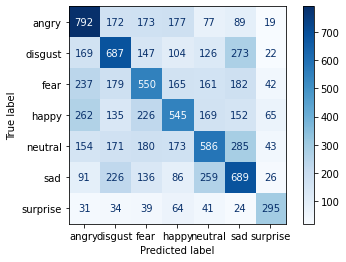

time to finish all process = 1:41:28.481232


In [ ]:
start_time = datetime.now()
model = LogisticRegression(solver= 'liblinear', penalty= 'l2', multi_class= 'ovr', max_iter= 200, fit_intercept= True, dual= True)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## RandomForestClassifier

### Default Parameter

              precision    recall  f1-score   support

       angry       0.75      0.87      0.81      1499
     disgust       0.70      0.77      0.73      1528
        fear       0.88      0.65      0.75      1516
       happy       0.79      0.75      0.77      1554
     neutral       0.78      0.79      0.79      1592
         sad       0.72      0.81      0.76      1513
    surprise       0.93      0.76      0.84       528

    accuracy                           0.77      9730
   macro avg       0.79      0.77      0.78      9730
weighted avg       0.78      0.77      0.77      9730

accuracy_score_RandomForestClassifier(): 0.7710174717368962
accuracy_score_RandomForestClassifier(): 0.7522222138579477 +/- 0.007196863810649671
list_cross_validation_RandomForestClassifier(): [0.75179856 0.75256937 0.75256937 0.75051387 0.77029805 0.74743063
 0.75128469 0.75719424 0.74171164 0.74685171]


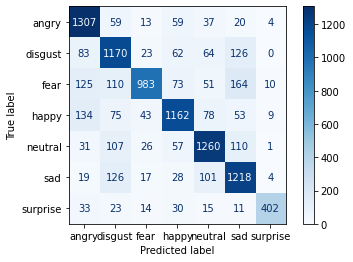

time to finish all process = 0:37:37.212600


In [ ]:
start_time = datetime.now()
model = RandomForestClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = RandomForestClassifier()
params = {
    'clf__n_estimators': [100,500,1000],
    'clf__max_features': ["auto", "sqrt"],
    'clf__max_depth' : [3,5,None],
    'clf__min_samples_split' : [2, 5, 10],
    'clf__min_samples_leaf' : [1, 2, 4],
    'clf__bootstrap': [True, False],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8557283950617285
best_params = {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': None, 'clf__bootstrap': False}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, max_features='sqrt',
                                        min_samples_leaf=2,
                                        min_samples_split=5))])
time to finish all process = 0:10:27.674169


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.80      0.88      0.84      1499
     disgust       0.75      0.80      0.77      1528
        fear       0.91      0.70      0.79      1516
       happy       0.83      0.78      0.80      1554
     neutral       0.81      0.84      0.83      1592
         sad       0.76      0.84      0.80      1513
    surprise       0.92      0.81      0.87       528

    accuracy                           0.81      9730
   macro avg       0.82      0.81      0.81      9730
weighted avg       0.81      0.81      0.81      9730

accuracy_score_RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5): 0.8082219938335046
accuracy_score_RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5): 0.7874243748519193 +/- 0.007561848297733014
list_cross_validation_RandomForestClassifier(bootstrap=Fal

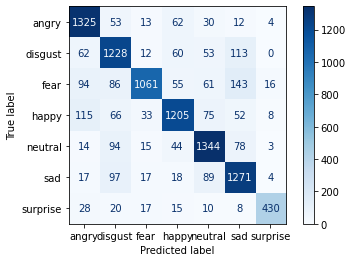

time to finish all process = 0:56:34.317229


In [ ]:
start_time = datetime.now()
model = RandomForestClassifier(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## KNeighborsClassifier

### Default Parameter

              precision    recall  f1-score   support

       angry       0.72      0.69      0.70      1499
     disgust       0.59      0.58      0.58      1528
        fear       0.52      0.56      0.54      1516
       happy       0.61      0.53      0.57      1554
     neutral       0.63      0.63      0.63      1592
         sad       0.55      0.67      0.61      1513
    surprise       0.89      0.64      0.74       528

    accuracy                           0.61      9730
   macro avg       0.64      0.61      0.63      9730
weighted avg       0.62      0.61      0.61      9730

accuracy_score_KNeighborsClassifier(): 0.6121274409044193
accuracy_score_KNeighborsClassifier(): 0.5895472013181392 +/- 0.004356290318672651
list_cross_validation_KNeighborsClassifier(): [0.58684481 0.59455293 0.59558068 0.58530319 0.59326824 0.58838643
 0.59326824 0.58119219 0.58750964 0.58956566]


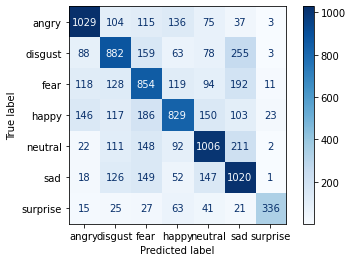

time to finish all process = 0:06:01.027932


In [ ]:
start_time = datetime.now()
model = KNeighborsClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = KNeighborsClassifier()
params = {
    'clf__n_neighbors': [5,7,9],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1,2],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.7114871794871794
best_params = {'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 5, 'clf__algorithm': 'auto'}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(p=1, weights='distance'))])
time to finish all process = 0:02:19.452441


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.90      0.79      0.84      1499
     disgust       0.82      0.68      0.74      1528
        fear       0.72      0.72      0.72      1516
       happy       0.79      0.73      0.76      1554
     neutral       0.76      0.78      0.77      1592
         sad       0.64      0.86      0.73      1513
    surprise       0.91      0.85      0.88       528

    accuracy                           0.76      9730
   macro avg       0.79      0.77      0.78      9730
weighted avg       0.78      0.76      0.77      9730

accuracy_score_KNeighborsClassifier(p=1, weights='distance'): 0.7649537512846866
accuracy_score_KNeighborsClassifier(p=1, weights='distance'): 0.74094226986513 +/- 0.004031075216782579
list_cross_validation_KNeighborsClassifier(p=1, weights='distance'): [0.74486125 0.73997945 0.73406989 0.74331963 0.74563207 0.73920863
 0.74537513 0.7438335  0.73554356 0.73759959]


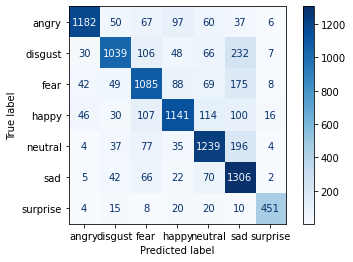

time to finish all process = 15:05:58.419791


In [ ]:
start_time = datetime.now()
model = KNeighborsClassifier(weights= 'distance', p= 1, n_neighbors= 5, algorithm= 'auto')
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## SVC

### Default Parameter

              precision    recall  f1-score   support

       angry       0.66      0.73      0.69      1499
     disgust       0.58      0.60      0.59      1528
        fear       0.63      0.44      0.52      1516
       happy       0.55      0.58      0.57      1554
     neutral       0.61      0.60      0.61      1592
         sad       0.59      0.68      0.64      1513
    surprise       0.77      0.67      0.72       528

    accuracy                           0.61      9730
   macro avg       0.63      0.62      0.62      9730
weighted avg       0.61      0.61      0.61      9730

accuracy_score_SVC(): 0.6102774922918808
accuracy_score_SVC(): 0.5934783421197836 +/- 0.0046592470598258665
list_cross_validation_SVC(): [0.58838643 0.59249743 0.5971223  0.58864337 0.59635149 0.59737924
 0.60174717 0.59558068 0.58648162 0.59059368]


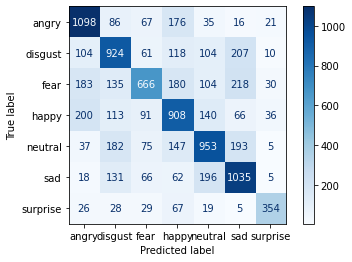

time to finish all process = 12:07:58.236496


In [ ]:
start_time = datetime.now()
model = SVC()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = SVC()
params = {
    'clf__gamma': ['scale','auto'],
    'clf__shrinking':[True,False],
    'clf__probability':[True,False],
    'clf__verbose':[True,False],
    'clf__decision_function_shape': ['ovo','ovr'],
    'clf__break_ties':[True,False],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]best_score = 0.5369876543209877
best_params = {'clf__verbose': True, 'clf__shrinking': True, 'clf__probability': True, 'clf__gamma': 'auto', 'clf__decision_function_shape': 'ovr', 'clf__break_ties': True}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SVC(break_ties=True, gamma='auto', probability=True,
                     verbose=True))])
time to finish all process = 0:09:03.498951


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.66      0.73      0.69      1499
     disgust       0.58      0.60      0.59      1528
        fear       0.63      0.44      0.52      1516
       happy       0.55      0.58      0.57      1554
     neutral       0.61      0.60      0.61      1592
         sad       0.59      0.68      0.64      1513
    surprise       0.77      0.67      0.72       528

    accuracy                           0.61      9730
   macro avg       0.63      0.62      0.62      9730
weighted avg       0.61      0.61      0.61      9730

accuracy_score_SVC(): 0.6102774922918808
accuracy_score_SVC(): 0.5934783421197836 +/- 0.0046592470598258665
list_cross_validation_SVC(): [0.58838643 0.59249743 0.5971223  0.58864337 0.59635149 0.59737924
 0.60174717 0.59558068 0.58648162 0.59059368]


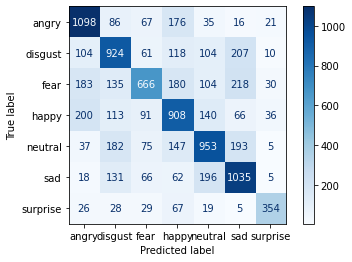

time to finish all process = 11:34:16.472560


In [ ]:
start_time = datetime.now()
model = SVC(verbose= True, shrinking= True, probability= True, gamma= 'auto', decision_function_shape= 'ovr', break_ties= True)

scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## GaussianNB

### Default Parameter

              precision    recall  f1-score   support

       angry       0.39      0.05      0.09      1499
     disgust       0.24      0.19      0.21      1528
        fear       0.33      0.10      0.16      1516
       happy       0.19      0.24      0.21      1554
     neutral       0.18      0.02      0.04      1592
         sad       0.28      0.22      0.24      1513
    surprise       0.09      0.78      0.16       528

    accuracy                           0.17      9730
   macro avg       0.24      0.23      0.16      9730
weighted avg       0.26      0.17      0.16      9730

accuracy_score_GaussianNB(): 0.17286742034943473
accuracy_score_GaussianNB(): 0.17855470882683655 +/- 0.005978530842739328
list_cross_validation_GaussianNB(): [0.1831963  0.18088386 0.172148   0.18679342 0.1873073  0.18216855
 0.17420349 0.16957862 0.17553328 0.17373426]


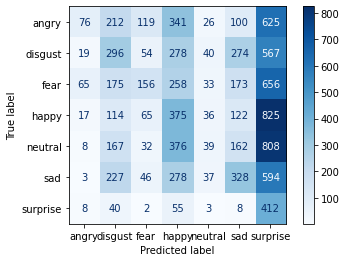

time to finish all process = 0:00:58.074541


In [ ]:
start_time = datetime.now()
model = GaussianNB()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = GaussianNB()
params = {
    'clf__priors':[0.1,0.5, 0.9,None],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.2755707502374169
best_params = {'clf__priors': None}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()), ('clf', GaussianNB())])
time to finish all process = 0:00:03.041185


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.39      0.05      0.09      1499
     disgust       0.24      0.19      0.21      1528
        fear       0.33      0.10      0.16      1516
       happy       0.19      0.24      0.21      1554
     neutral       0.18      0.02      0.04      1592
         sad       0.28      0.22      0.24      1513
    surprise       0.09      0.78      0.16       528

    accuracy                           0.17      9730
   macro avg       0.24      0.23      0.16      9730
weighted avg       0.26      0.17      0.16      9730

accuracy_score_GaussianNB(): 0.17286742034943473
accuracy_score_GaussianNB(): 0.17855470882683655 +/- 0.005978530842739328
list_cross_validation_GaussianNB(): [0.1831963  0.18088386 0.172148   0.18679342 0.1873073  0.18216855
 0.17420349 0.16957862 0.17553328 0.17373426]


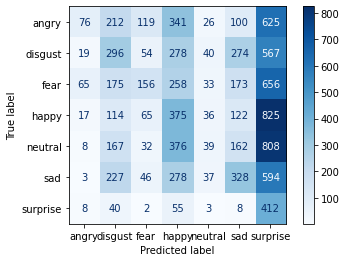

time to finish all process = 0:01:05.624000


In [ ]:
start_time = datetime.now()
model = GaussianNB(priors= None)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## XGBClassifier

### Default Parameter

              precision    recall  f1-score   support

       angry       0.56      0.67      0.61      1499
     disgust       0.43      0.56      0.48      1528
        fear       0.59      0.28      0.38      1516
       happy       0.45      0.39      0.42      1554
     neutral       0.48      0.47      0.48      1592
         sad       0.46      0.59      0.52      1513
    surprise       0.69      0.49      0.57       528

    accuracy                           0.49      9730
   macro avg       0.52      0.49      0.49      9730
weighted avg       0.50      0.49      0.49      9730

accuracy_score_XGBClassifier(objective='multi:softprob'): 0.4921891058581706
accuracy_score_XGBClassifier(objective='multi:softprob'): 0.4953229750157358 +/- 0.0064093302410578035
list_cross_validation_XGBClassifier(objective='multi:softprob'): [0.4979445  0.49820144 0.50256937 0.48920863 0.49640288 0.49563207
 0.50025694 0.50282631 0.48239527 0.48779234]


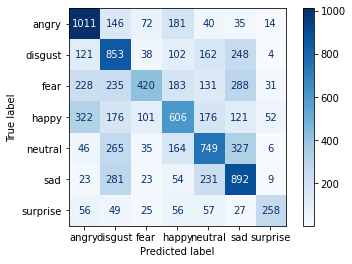

time to finish all process = 7:12:24.549503


In [ ]:
start_time = datetime.now()
model = XGBClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = XGBClassifier()
params = {
    'clf__max_depth': [ 3, 6, 8, 10, 12, 15 ],
    'clf__learning_rate': [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'clf__n_estimators': [ 50, 75, 100, 125, 150 ],
    'clf__min_child_weight': [ 1, 3, 5, 7 ],
    'clf__gamma': [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
    'clf__colsample_bytree': [ 0.3, 0.4, 0.5, 0.7 ] 
} 

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8421804368471036
best_params = {'clf__n_estimators': 150, 'clf__min_child_weight': 1, 'clf__max_depth': 15, 'clf__learning_rate': 0.1, 'clf__gamma': 0.0, 'clf__colsample_bytree': 0.4}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.4, gamma=0.0, max_depth=15,
                               n_estimators=150, objective='multi:softprob'))])
time to finish all process = 1:27:37.176327


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.56      0.67      0.61      1499
     disgust       0.43      0.56      0.48      1528
        fear       0.59      0.28      0.38      1516
       happy       0.45      0.39      0.42      1554
     neutral       0.48      0.47      0.48      1592
         sad       0.46      0.59      0.52      1513
    surprise       0.69      0.49      0.57       528

    accuracy                           0.49      9730
   macro avg       0.52      0.49      0.49      9730
weighted avg       0.50      0.49      0.49      9730

accuracy_score_XGBClassifier(objective='multi:softprob'): 0.4921891058581706
accuracy_score_XGBClassifier(objective='multi:softprob'): 0.4953229750157358 +/- 0.0064093302410578035
list_cross_validation_XGBClassifier(objective='multi:softprob'): [0.4979445  0.49820144 0.50256937 0.48920863 0.49640288 0.49563207
 0.50025694 0.50282631 0.48239527 0.48779234]


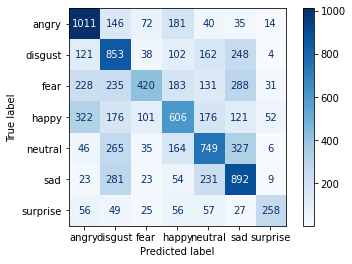

time to finish all process = 9:23:21.820642


In [ ]:
start_time = datetime.now()
model = XGBClassifier(n_estimators= 150, min_child_weight= 1, max_depth= 15, learning_rate= 0.1, gamma= 0.0, colsample_bytree= 0.4)
# model = XGBClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## SGDClassifier

### Default Parameter

              precision    recall  f1-score   support

       angry       0.45      0.46      0.45      1499
     disgust       0.38      0.35      0.37      1528
        fear       0.33      0.37      0.35      1516
       happy       0.27      0.31      0.28      1554
     neutral       0.40      0.30      0.34      1592
         sad       0.36      0.41      0.39      1513
    surprise       0.39      0.29      0.33       528

    accuracy                           0.36      9730
   macro avg       0.37      0.36      0.36      9730
weighted avg       0.37      0.36      0.36      9730

accuracy_score_SGDClassifier(): 0.3615621788283659
accuracy_score_SGDClassifier(): 0.3715245514789842 +/- 0.013595661679487264
list_cross_validation_SGDClassifier(): [0.37846865 0.36896197 0.33941418 0.37204522 0.38257965 0.38463515
 0.36305242 0.39054471 0.3695708  0.36597276]


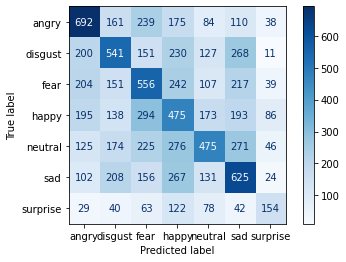

time to finish all process = 1:22:25.160107


In [ ]:
start_time = datetime.now()
model = SGDClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = SGDClassifier()
params = {
    'clf__penalty': ['l2', 'l1', 'elasticnet'],
    'clf__l1_ratio': [0.15,0.50,0.85],
    'clf__fit_intercept': [True,False],
    'clf__max_iter': [1000,2000,4000],
    'clf__shuffle': [True,False],
    'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.7867084520417854
best_params = {'clf__shuffle': False, 'clf__penalty': 'l1', 'clf__max_iter': 4000, 'clf__learning_rate': 'optimal', 'clf__l1_ratio': 0.5, 'clf__fit_intercept': True}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SGDClassifier(l1_ratio=0.5, max_iter=4000, penalty='l1',
                               shuffle=False))])
time to finish all process = 0:01:54.890087


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.43      0.43      0.43      1499
     disgust       0.38      0.38      0.38      1528
        fear       0.38      0.31      0.34      1516
       happy       0.29      0.30      0.30      1554
     neutral       0.38      0.36      0.37      1592
         sad       0.37      0.49      0.42      1513
    surprise       0.39      0.29      0.33       528

    accuracy                           0.37      9730
   macro avg       0.38      0.37      0.37      9730
weighted avg       0.37      0.37      0.37      9730

accuracy_score_SGDClassifier(): 0.37276464542651594
accuracy_score_SGDClassifier(): 0.3693150821340945 +/- 0.009965228657564985
list_cross_validation_SGDClassifier(): [0.38669065 0.34866393 0.37153135 0.36253854 0.37641316 0.35996917
 0.36716341 0.37718397 0.37136983 0.37162683]


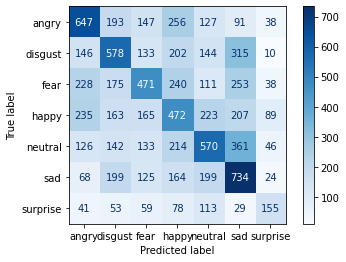

time to finish all process = 1:13:39.389341


In [ ]:
start_time = datetime.now()
model = SGDClassifier(shuffle= False, penalty= 'l1', max_iter= 4000, learning_rate= 'optimal', l1_ratio= 0.5, fit_intercept= True)

scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## MLPClassifier

### Default Parameter

              precision    recall  f1-score   support

       angry       0.87      0.89      0.88      1499
     disgust       0.81      0.87      0.84      1528
        fear       0.76      0.84      0.80      1516
       happy       0.86      0.81      0.83      1554
     neutral       0.85      0.82      0.84      1592
         sad       0.86      0.79      0.83      1513
    surprise       0.92      0.88      0.90       528

    accuracy                           0.84      9730
   macro avg       0.85      0.84      0.84      9730
weighted avg       0.84      0.84      0.84      9730

accuracy_score_MLPClassifier(): 0.8384378211716341
accuracy_score_MLPClassifier(): 0.7987048074944604 +/- 0.01398795930919349
list_cross_validation_MLPClassifier(): [0.78674203 0.81320658 0.79136691 0.78263104 0.8147482  0.77774923
 0.80935252 0.82014388 0.79465433 0.79645335]


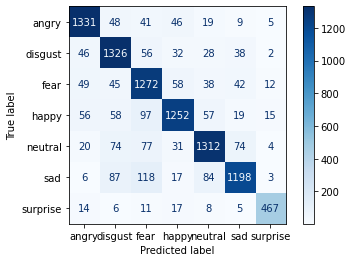

time to finish all process = 2:40:07.579894


In [ ]:
start_time = datetime.now()
model = MLPClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = MLPClassifier()
params = {
    'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'clf__solver': ['lbfgs', 'sgd', 'adam'],
    'clf__power_t': [0.1,0.5,0.8],
    'clf__max_iter': [200,800,1600],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8853390313390314
best_params = {'clf__solver': 'adam', 'clf__power_t': 0.5, 'clf__max_iter': 1600, 'clf__activation': 'tanh'}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', MLPClassifier(activation='tanh', max_iter=1600))])
time to finish all process = 0:30:26.593707


### Evaluation Model with tuning parameter

              precision    recall  f1-score   support

       angry       0.87      0.84      0.86      1499
     disgust       0.79      0.83      0.81      1528
        fear       0.81      0.75      0.78      1516
       happy       0.81      0.82      0.81      1554
     neutral       0.83      0.81      0.82      1592
         sad       0.76      0.83      0.79      1513
    surprise       0.90      0.87      0.89       528

    accuracy                           0.82      9730
   macro avg       0.83      0.82      0.82      9730
weighted avg       0.82      0.82      0.82      9730

accuracy_score_MLPClassifier(): 0.8159301130524153
accuracy_score_MLPClassifier(): 0.7981908272258722 +/- 0.01106068108832314
list_cross_validation_MLPClassifier(): [0.80061665 0.81166495 0.80652621 0.80421377 0.7934224  0.8126927
 0.77338129 0.79239466 0.79491133 0.7920843 ]


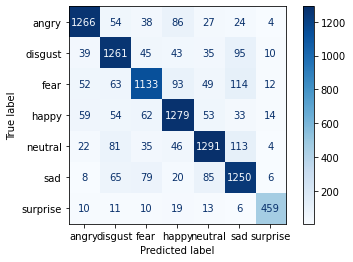

time to finish all process = 2:40:24.168497


In [ ]:
start_time = datetime.now()
model = MLPClassifier(solver= 'adam', power_t= 0.5, max_iter= 1600, activation= 'tanh')
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

# Deep Learnning

# train_test_split_deep_learning

In [ ]:
# df = df[:1000]

In [ ]:
X = df.drop(labels="labels", axis=1)
y = df["labels"]

In [ ]:
label_encoder = LabelEncoder()
y = np_utils.to_categorical(label_encoder.fit_transform(y))
y,label_encoder.classes_

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
       dtype=object))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=300, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=300, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

In [ ]:
standard_scaler = StandardScaler()
X_train_scalar = standard_scaler.fit_transform(X_train)
X_test_scalar = standard_scaler.transform(X_test)
X_train_scalar.shape, X_test_scalar.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

In [ ]:
X_train_scalar = np.expand_dims(X_train_scalar, axis=2)
X_test_scalar = np.expand_dims(X_test_scalar, axis=2)
X_train_scalar.shape,X_test_scalar.shape

((38918, 2376, 1), (9730, 2376, 1))

In [ ]:
early_stop = EarlyStopping(patience = 7, restore_best_weights = True, mode = 'auto', monitor ="val_acc" )

In [ ]:
lr_reduction = ReduceLROnPlateau(patience=5,min_lr=0.00001, factor=0.5, verbose=1,monitor='val_acc')

In [ ]:
# import keras library
from keras import backend as KB

# create recall metric function
def recall_model(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    possible_positives = KB.sum(KB.round(KB.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + KB.epsilon())
    return recall

# create precision metric function
def precision_model(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    predicted_positives = KB.sum(KB.round(KB.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + KB.epsilon())
    return precision

# create f1-score metric function
def f1_model(y_true, y_pred):
    precision = precision_model(y_true, y_pred)
    recall = recall_model(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+KB.epsilon()))

# CNN

## Train model

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (X_train_scalar.shape[1], 1)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 5, padding = 'same'))

cnn_model.add(layers.Conv1D(128, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 3, padding = 'same'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dense(7, activation = "softmax"))

cnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

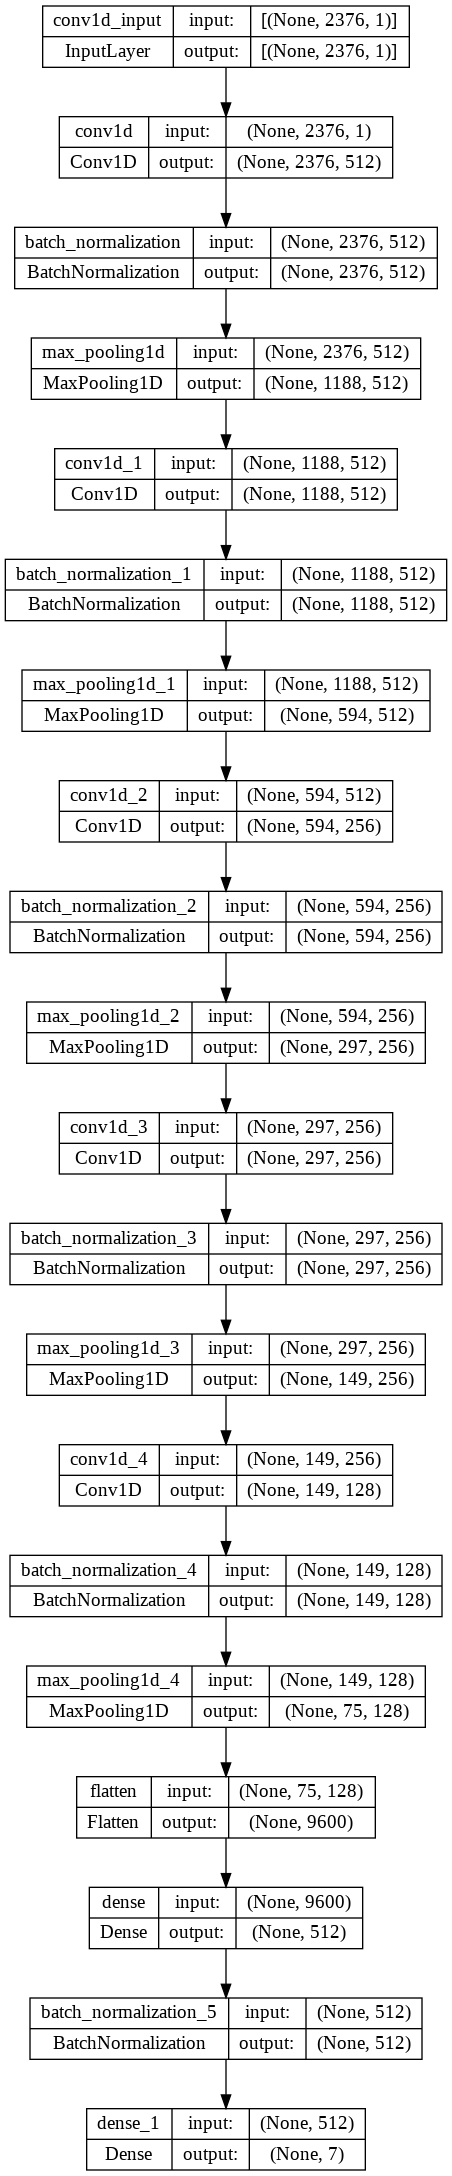

In [ ]:
plot_model(cnn_model, show_shapes = True)

In [ ]:
cnn_history = cnn_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 224s 180ms/step - loss: 1.4719 - acc: 0.4449 - f1_model: 0.3663 - recall_model: 0.2703 - precision_model: 0.5882 - val_loss: 2.0843 - val_acc: 0.3976 - val_f1_model: 0.3765 - val_recall_model: 0.3248 - val_precision_model: 0.4515 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 219s 180ms/step - loss: 1.1258 - acc: 0.5635 - f1_model: 0.5159 - recall_model: 0.4083 - precision_model: 0.7114 - val_loss: 1.2047 - val_acc: 0.5320 - val_f1_model: 0.5064 - val_recall_model: 0.4141 - val_precision_model: 0.6591 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 218s 179ms/step - loss: 0.9986 - acc: 0.6158 - f1_model: 0.5849 - recall_model: 0.4838 - precision_model: 0.7475 - val_loss: 1.2026 - val_acc: 0.5708 - val_f1_model: 0.5569 - val_recall_model: 0.4792 - val_precision_model: 0.6702 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 218s 179ms/step - loss: 0.8799 - acc: 0.6658 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 15s 48ms/step - loss: 0.1661 - acc: 0.9691 - f1_model: 0.9697 - recall_model: 0.9688 - precision_model: 0.9706
[0.16611868143081665, 0.9690647721290588, 0.9696802496910095, 0.96875, 0.9706405997276306]
test_loss: 0.16611868143081665
test_accuracy: 0.9690647721290588
test_f1: 0.9696802496910095
test_precision: 0.96875
test_recall: 0.9706405997276306


In [ ]:
cnn_history.history

{'loss': [1.4718989133834839,
  1.1257679462432861,
  0.9986315369606018,
  0.879944920539856,
  0.7617443203926086,
  0.6399399042129517,
  0.5140371322631836,
  0.41594451665878296,
  0.3283870816230774,
  0.259032279253006,
  0.21011674404144287,
  0.17619892954826355,
  0.1541128158569336,
  0.13164494931697845,
  0.12167041003704071,
  0.11059311777353287,
  0.09488403052091599,
  0.09829568862915039,
  0.08836541324853897,
  0.0858302190899849,
  0.08008980005979538,
  0.07588301599025726,
  0.0767616406083107,
  0.031843483448028564,
  0.020197952166199684,
  0.021169167011976242,
  0.018895231187343597,
  0.017898252233862877,
  0.017303600907325745,
  0.01690039224922657,
  0.016098180785775185,
  0.015945900231599808,
  0.014987634494900703,
  0.014849239960312843,
  0.014005170203745365,
  0.015506011433899403,
  0.014565080404281616,
  0.008925423957407475,
  0.0064996387809515,
  0.005098054651170969,
  0.005519063211977482,
  0.004196148365736008,
  0.004451290238648653,


In [ ]:
from sklearn.metrics import roc_auc_score
predition = cnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 98.24%


## virtualization

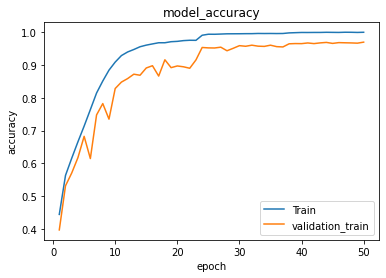

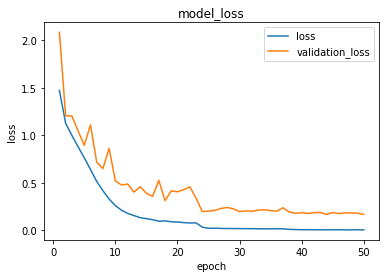

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(cnn_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['acc'])
plt.plot(total_epoch,cnn_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['loss'])
plt.plot(total_epoch,cnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = cnn_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

array([0, 5, 0, ..., 3, 5, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

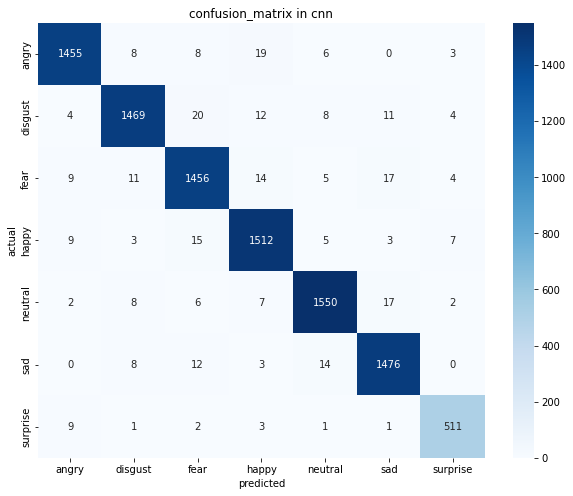

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1499
           1       0.97      0.96      0.97      1528
           2       0.96      0.96      0.96      1516
           3       0.96      0.97      0.97      1554
           4       0.98      0.97      0.98      1592
           5       0.97      0.98      0.97      1513
           6       0.97      0.97      0.97       528

   micro avg       0.97      0.97      0.97      9730
   macro avg       0.97      0.97      0.97      9730
weighted avg       0.97      0.97      0.97      9730
 samples avg       0.97      0.97      0.97      9730



In [ ]:
# show accuracy in convolution neural network 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9686536485097637


## predict_data

## save model

In [ ]:
cnn_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/cnn_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/cnn_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

array([0, 5, 0, ..., 3, 5, 1])

# CNN epoch 150

## Train model

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (X_train_scalar.shape[1], 1)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 5, padding = 'same'))

cnn_model.add(layers.Conv1D(128, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 3, padding = 'same'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dense(7, activation = "softmax"))

cnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                      

In [ ]:
cnn_history = cnn_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=150, batch_size=32)

Epoch 1/150
1217/1217 [==============================] - 221s 173ms/step - loss: 1.4332 - acc: 0.4628 - f1_model: 0.4015 - recall_model: 0.3056 - precision_model: 0.6039 - val_loss: 1.6853 - val_acc: 0.4163 - val_f1_model: 0.3932 - val_recall_model: 0.3300 - val_precision_model: 0.4917 - lr: 0.0010
Epoch 2/150
1217/1217 [==============================] - 212s 174ms/step - loss: 1.0905 - acc: 0.5807 - f1_model: 0.5426 - recall_model: 0.4396 - precision_model: 0.7179 - val_loss: 1.2269 - val_acc: 0.5588 - val_f1_model: 0.5291 - val_recall_model: 0.4498 - val_precision_model: 0.6480 - lr: 0.0010
Epoch 3/150
1217/1217 [==============================] - 212s 174ms/step - loss: 0.9418 - acc: 0.6423 - f1_model: 0.6173 - recall_model: 0.5240 - precision_model: 0.7570 - val_loss: 1.0577 - val_acc: 0.6173 - val_f1_model: 0.6017 - val_recall_model: 0.5285 - val_precision_model: 0.7022 - lr: 0.0010
Epoch 4/150
1217/1217 [==============================] - 212s 174ms/step - loss: 0.8010 - acc: 0.698

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 14s 46ms/step - loss: 0.1467 - acc: 0.9746 - f1_model: 0.9749 - recall_model: 0.9745 - precision_model: 0.9753
[0.1467401534318924, 0.9746146202087402, 0.9748877286911011, 0.9744877219200134, 0.9753007888793945]
test_loss: 0.1467401534318924
test_accuracy: 0.9746146202087402
test_f1: 0.9748877286911011
test_precision: 0.9744877219200134
test_recall: 0.9753007888793945


In [ ]:
cnn_history.history

{'loss': [1.433168888092041,
  1.09048330783844,
  0.9418458938598633,
  0.8010128140449524,
  0.6495941877365112,
  0.511742353439331,
  0.3930589258670807,
  0.3018186688423157,
  0.23499928414821625,
  0.1958879977464676,
  0.16306982934474945,
  0.13766971230506897,
  0.12097354233264923,
  0.11139995604753494,
  0.10339199751615524,
  0.09042428433895111,
  0.08857885003089905,
  0.07695877552032471,
  0.07371623814105988,
  0.06755194813013077,
  0.06547662615776062,
  0.06416819244623184,
  0.06404886394739151,
  0.05650447681546211,
  0.057010479271411896,
  0.05672937259078026,
  0.0534391775727272,
  0.054159924387931824,
  0.05499516800045967,
  0.050095152109861374,
  0.05025763064622879,
  0.04672320932149887,
  0.04477467015385628,
  0.04366743937134743,
  0.04693271219730377,
  0.03994278237223625,
  0.04776960611343384,
  0.04116656258702278,
  0.04082530736923218,
  0.03755582496523857,
  0.016152646392583847,
  0.012442835606634617,
  0.01106235571205616,
  0.00857856

In [ ]:
from sklearn.metrics import roc_auc_score
predition = cnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 14s 46ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 98.54%


## virtualization

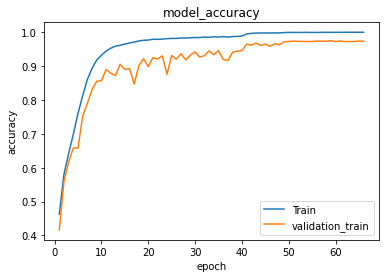

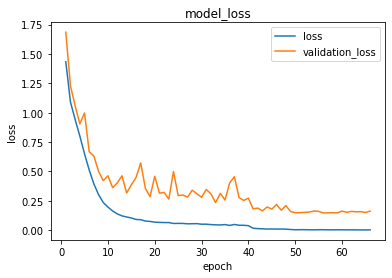

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(cnn_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['acc'])
plt.plot(total_epoch,cnn_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['loss'])
plt.plot(total_epoch,cnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = cnn_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 14s 46ms/step


array([0, 5, 0, ..., 3, 5, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

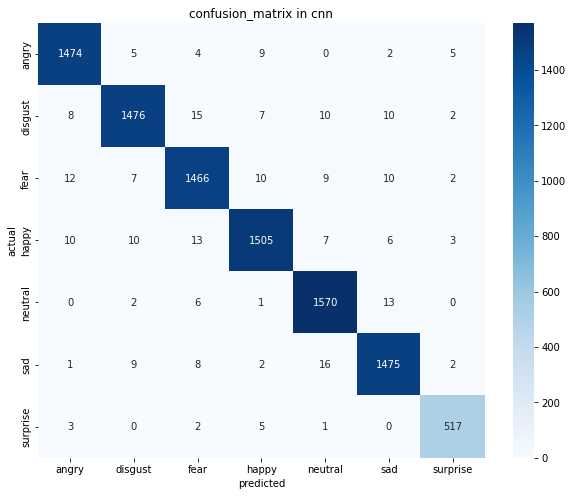

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1499
           1       0.98      0.97      0.97      1528
           2       0.97      0.97      0.97      1516
           3       0.98      0.97      0.97      1554
           4       0.97      0.99      0.98      1592
           5       0.97      0.97      0.97      1513
           6       0.97      0.98      0.98       528

   micro avg       0.98      0.97      0.97      9730
   macro avg       0.98      0.97      0.97      9730
weighted avg       0.98      0.97      0.97      9730
 samples avg       0.97      0.97      0.97      9730



In [ ]:
# show accuracy in convolution neural network 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9744090441932168


## predict_data

## save model

In [ ]:
cnn_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/cnn_modelv2.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/cnn_modelv2.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 14s 46ms/step


array([0, 5, 0, ..., 3, 5, 1])

# LSTM

## Train model

In [ ]:
lstm_model = Sequential()
# First layer
lstm_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_scalar.shape[1],1)))
lstm_model.add(Dropout(0.2))
# Second layer
lstm_model.add(LSTM(units=128, return_sequences=True))
lstm_model.add(Dropout(0.2))
# Third layer
lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))
# Fourth layer
lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))

# # fifth layer
lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))

# The output layer
# lstm_model.add(Dense(units=1))

# lstm_model.add(layers.Dense(7, activation = "softmax"))

lstm_model.add(layers.Flatten())
lstm_model.add(layers.Dense(128, activation = 'relu'))
lstm_model.add(layers.BatchNormalization())
lstm_model.add(layers.Dense(7, activation = "softmax"))

# complie the RNN
lstm_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ["acc", f1_model, recall_model, precision_model])

# lstm_model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics = ["acc", f1_model, recall_model, precision_model])
# cnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])


lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2376, 128)         66560     
                                                                 
 dropout (Dropout)           (None, 2376, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 2376, 128)         131584    
                                                                 
 dropout_1 (Dropout)         (None, 2376, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 2376, 64)          49408     
                                                                 
 dropout_2 (Dropout)         (None, 2376, 64)          0         
                                                                 
 lstm_3 (LSTM)               (None, 2376, 64)          3

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

lstm_history = lstm_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 573s 464ms/step - loss: 1.6078 - acc: 0.3632 - f1_model: 0.2002 - recall_model: 0.1290 - precision_model: 0.5619 - val_loss: 1.9685 - val_acc: 0.3508 - val_f1_model: 0.3098 - val_recall_model: 0.2322 - val_precision_model: 0.4770 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 570s 469ms/step - loss: 1.2395 - acc: 0.5202 - f1_model: 0.4403 - recall_model: 0.3240 - precision_model: 0.7088 - val_loss: 1.1512 - val_acc: 0.5575 - val_f1_model: 0.4902 - val_recall_model: 0.3689 - val_precision_model: 0.7489 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 568s 467ms/step - loss: 1.0343 - acc: 0.6033 - f1_model: 0.5543 - recall_model: 0.4411 - precision_model: 0.7562 - val_loss: 1.0893 - val_acc: 0.5826 - val_f1_model: 0.5177 - val_recall_model: 0.3982 - val_precision_model: 0.7534 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 573s 471ms/step - loss: 0.8313 - acc: 0.6885 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = lstm_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 55s 179ms/step - loss: 0.2944 - acc: 0.9505 - f1_model: 0.9511 - recall_model: 0.9501 - precision_model: 0.9522
[0.29441994428634644, 0.9504624605178833, 0.9511204361915588, 0.9501024484634399, 0.9521714448928833]
test_loss: 0.29441994428634644
test_accuracy: 0.9504624605178833
test_f1: 0.9511204361915588
test_precision: 0.9501024484634399
test_recall: 0.9521714448928833


In [ ]:
lstm_history.history

{'loss': [1.6077665090560913,
  1.2395063638687134,
  1.0343250036239624,
  0.8313025236129761,
  0.6106820702552795,
  0.41667529940605164,
  0.2724848985671997,
  0.1825704276561737,
  0.1437281221151352,
  0.11143431812524796,
  0.09632525593042374,
  0.08740359544754028,
  0.07528013736009598,
  0.06650698184967041,
  0.06356260925531387,
  0.05830598995089531,
  0.05738166719675064,
  0.053452249616384506,
  0.0498606339097023,
  0.04641037434339523,
  0.04242276772856712,
  0.018089020624756813,
  0.011721734888851643,
  0.01010412909090519,
  0.009495151229202747,
  0.007775977253913879,
  0.008825656026601791,
  0.0074413190595805645,
  0.007487834896892309,
  0.008108547888696194,
  0.0039270794950425625,
  0.004291852470487356,
  0.003086776938289404,
  0.002445898950099945,
  0.0016688189934939146,
  0.002156817354261875,
  0.0017293421551585197,
  0.0019880146719515324,
  0.0018368413439020514,
  0.002348606940358877,
  0.0013897253666073084,
  0.0015446586767211556,
  0.00

In [ ]:
from sklearn.metrics import roc_auc_score
predition = lstm_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 97.15%


## virtualization

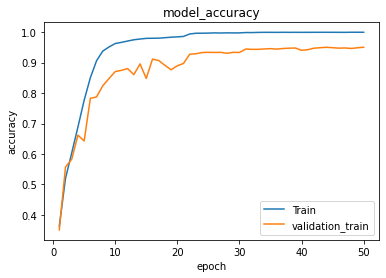

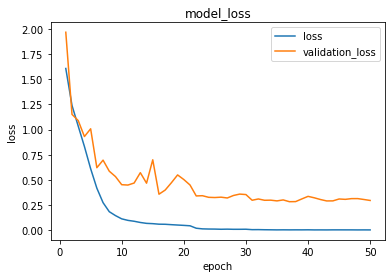

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(lstm_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,lstm_history.history['acc'])
plt.plot(total_epoch,lstm_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,lstm_history.history['loss'])
plt.plot(total_epoch,lstm_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = lstm_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

array([0, 5, 0, ..., 3, 5, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

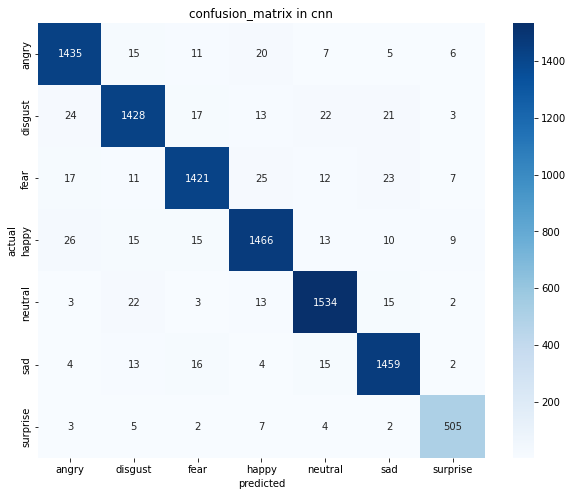

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1499
           1       0.95      0.93      0.94      1528
           2       0.96      0.94      0.95      1516
           3       0.95      0.94      0.95      1554
           4       0.96      0.96      0.96      1592
           5       0.95      0.96      0.96      1513
           6       0.95      0.96      0.95       528

   micro avg       0.95      0.95      0.95      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.95      0.95      0.95      9730
 samples avg       0.95      0.95      0.95      9730



In [ ]:
# show accuracy in lstm 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9499486125385406


## predict_data

## save model

In [ ]:
lstm_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/lstm_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/lstm_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

array([0, 5, 0, ..., 3, 5, 1])

# GRU

## Train model

In [ ]:
# The GRU architecture
gru_model = Sequential()
# First GRU layer with Dropout regularisation
gru_model.add(GRU(units=128, return_sequences=True, input_shape=(X_train.shape[1],1)))
gru_model.add(Dropout(0.2))
# Second GRU layer
gru_model.add(GRU(units=128, return_sequences=True))
gru_model.add(Dropout(0.2))
# Third GRU layer
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))
# Fourth GRU layer
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))

# Fifth GRU layer
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))

# The output layer
gru_model.add(layers.Flatten())
gru_model.add(layers.Dense(128, activation = 'relu'))
gru_model.add(layers.BatchNormalization())
gru_model.add(layers.Dense(7, activation = "softmax"))
# Compiling the RNN
gru_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ["acc", f1_model, recall_model, precision_model])

# Fitting to the training set


In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

gru_history = gru_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 493s 393ms/step - loss: 1.5649 - acc: 0.3821 - f1_model: 0.2222 - recall_model: 0.1486 - precision_model: 0.5414 - val_loss: 1.5948 - val_acc: 0.4491 - val_f1_model: 0.3920 - val_recall_model: 0.3005 - val_precision_model: 0.5738 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 482s 396ms/step - loss: 1.2226 - acc: 0.5304 - f1_model: 0.4601 - recall_model: 0.3447 - precision_model: 0.7098 - val_loss: 1.2917 - val_acc: 0.5070 - val_f1_model: 0.4711 - val_recall_model: 0.3790 - val_precision_model: 0.6298 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 486s 400ms/step - loss: 1.0420 - acc: 0.6033 - f1_model: 0.5594 - recall_model: 0.4492 - precision_model: 0.7519 - val_loss: 1.6597 - val_acc: 0.5461 - val_f1_model: 0.5194 - val_recall_model: 0.4376 - val_precision_model: 0.6441 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 488s 401ms/step - loss: 0.8885 - acc: 0.6637 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = gru_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 52s 172ms/step - loss: 0.2833 - acc: 0.9506 - f1_model: 0.9513 - recall_model: 0.9505 - precision_model: 0.9521
[0.28326931595802307, 0.9505652785301208, 0.9512946605682373, 0.9505122900009155, 0.9521021246910095]
test_loss: 0.28326931595802307
test_accuracy: 0.9505652785301208
test_f1: 0.9512946605682373
test_precision: 0.9505122900009155
test_recall: 0.9521021246910095


In [ ]:
gru_history.history

{'loss': [1.5648685693740845,
  1.2226179838180542,
  1.0420385599136353,
  0.8884751200675964,
  0.727462112903595,
  0.5848599672317505,
  0.4519338309764862,
  0.3517719507217407,
  0.2634812593460083,
  0.21228636801242828,
  0.17120683193206787,
  0.1416959911584854,
  0.12035956233739853,
  0.10993403941392899,
  0.09926435351371765,
  0.08433083444833755,
  0.07665905356407166,
  0.07688751816749573,
  0.06925226747989655,
  0.06717291474342346,
  0.059338510036468506,
  0.029275357723236084,
  0.019012119621038437,
  0.01730811782181263,
  0.01618044823408127,
  0.01508278213441372,
  0.012973535805940628,
  0.012641629204154015,
  0.012067871168255806,
  0.012988842092454433,
  0.011948787607252598,
  0.01143668033182621,
  0.010835410095751286,
  0.005926176905632019,
  0.005772505421191454,
  0.0043527064844965935,
  0.004380991216748953,
  0.004159385804086924,
  0.0035339873284101486,
  0.0027770940214395523,
  0.003047138685360551,
  0.003407607087865472,
  0.003206482622

In [ ]:
from sklearn.metrics import roc_auc_score
predition = gru_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 97.28%


## virtualization

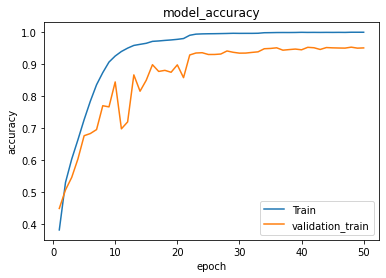

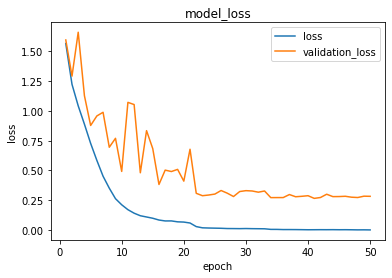

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(gru_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,gru_history.history['acc'])
plt.plot(total_epoch,gru_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,gru_history.history['loss'])
plt.plot(total_epoch,gru_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = gru_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

array([0, 5, 0, ..., 3, 5, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

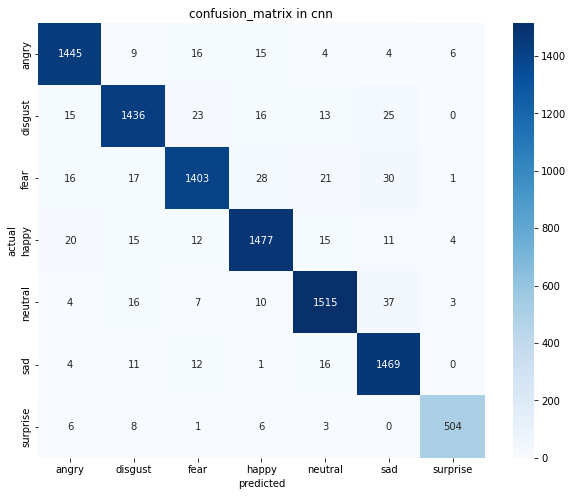

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1499
           1       0.95      0.94      0.95      1528
           2       0.95      0.93      0.94      1516
           3       0.95      0.95      0.95      1554
           4       0.96      0.95      0.95      1592
           5       0.93      0.97      0.95      1513
           6       0.97      0.95      0.96       528

   micro avg       0.95      0.95      0.95      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.95      0.95      0.95      9730
 samples avg       0.95      0.95      0.95      9730



In [ ]:
# show accuracy in lstm 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9503597122302159


## predict_data

## save model

In [ ]:
gru_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gru_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gru_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

array([0, 5, 0, ..., 3, 5, 1])

# RNN[ASK PROFESSOR]

## Train model

In [ ]:
# Initialising the RNN
recurrent_neural_network_model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 128, return_sequences = True, input_shape = (X_train_scalar.shape[1], 1)))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 128, return_sequences = True))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 64, return_sequences = True))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 64, return_sequences = True))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a fifth RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 64))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding the output layer
recurrent_neural_network_model.add(Dense(units = 7))

# Compiling the RNN
recurrent_neural_network_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ["acc", f1_model, recall_model, precision_model])

recurrent_neural_network_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 2376, 50)          2600      
                                                                 
 dropout_41 (Dropout)        (None, 2376, 50)          0         
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 2376, 50)          5050      
                                                                 
 dropout_42 (Dropout)        (None, 2376, 50)          0         
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 2376, 50)          5050      
                                                                 
 dropout_43 (Dropout)        (None, 2376, 50)          0         
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 50)               

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

recurrent_neural_network_history = recurrent_neural_network_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=3, batch_size=32)

Epoch 1/3
   2/1095 [..............................] - ETA: 2:10:28 - loss: 0.7281 - accuracy: 0.1562 - f1_model: 0.2322 - recall_model: 0.3125 - precision_model: 0.1859

KeyboardInterrupt: ignored

# DNN

## Train model

In [ ]:
# Initialising the DNN
dnn_model = Sequential()

# Adding the input layer and the first hidden layer
dnn_model.add(Dense(units=512,activation="relu", input_shape = (X_train_scalar.shape[1], 1)))
# Adding dropout to prevent overfitting
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=512,activation="relu"))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=256,activation="relu"))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=256,activation="relu"))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=128,activation="relu"))
dnn_model.add(Dropout(0.2))

# Adding the output layer
dnn_model.add(layers.Flatten())
dnn_model.add(layers.Dense(512, activation = 'relu'))
dnn_model.add(layers.BatchNormalization())
dnn_model.add(Dense(units=7,activation="softmax"))

# Compiling the DNN
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2376, 512)         1024      
                                                                 
 dropout (Dropout)           (None, 2376, 512)         0         
                                                                 
 dense_3 (Dense)             (None, 2376, 512)         262656    
                                                                 
 dropout_1 (Dropout)         (None, 2376, 512)         0         
                                                                 
 dense_4 (Dense)             (None, 2376, 256)         131328    
                                                                 
 dropout_2 (Dropout)         (None, 2376, 256)         0         
                                                                 
 dense_5 (Dense)             (None, 2376, 256)        

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

dnn_history = dnn_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 211s 172ms/step - loss: 1.5753 - acc: 0.3945 - f1_model: 0.2526 - recall_model: 0.1667 - precision_model: 0.5646 - val_loss: 3.7429 - val_acc: 0.2925 - val_f1_model: 0.2792 - val_recall_model: 0.2420 - val_precision_model: 0.3324 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 208s 171ms/step - loss: 1.3207 - acc: 0.4902 - f1_model: 0.3924 - recall_model: 0.2803 - precision_model: 0.6764 - val_loss: 18.1107 - val_acc: 0.2964 - val_f1_model: 0.2821 - val_recall_model: 0.2449 - val_precision_model: 0.3349 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 208s 171ms/step - loss: 1.1540 - acc: 0.5609 - f1_model: 0.4993 - recall_model: 0.3845 - precision_model: 0.7237 - val_loss: 1.4804 - val_acc: 0.5134 - val_f1_model: 0.4938 - val_recall_model: 0.4238 - val_precision_model: 0.5961 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 208s 171ms/step - loss: 1.0024 - acc: 0.6216 -

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = dnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 10s 34ms/step - loss: 1.1421 - acc: 0.7987 - f1_model: 0.7992 - recall_model: 0.7936 - precision_model: 0.8050
[1.1421270370483398, 0.7986639142036438, 0.7992157340049744, 0.7936475276947021, 0.8050283193588257]
test_loss: 1.1421270370483398
test_accuracy: 0.7986639142036438
test_f1: 0.7992157340049744
test_precision: 0.7936475276947021
test_recall: 0.8050283193588257


In [ ]:
dnn_history.history

{'loss': [1.5752711296081543,
  1.3207134008407593,
  1.1539841890335083,
  1.0023763179779053,
  0.861082136631012,
  0.7281743884086609,
  0.628688395023346,
  0.5202250480651855,
  0.440494179725647,
  0.3740179240703583,
  0.3181725740432739,
  0.2717945873737335,
  0.23655657470226288,
  0.21098430454730988,
  0.18890462815761566,
  0.1672881692647934,
  0.1540830433368683,
  0.1468462198972702,
  0.1338057965040207,
  0.12445731461048126,
  0.07142044603824615,
  0.06137737259268761,
  0.05121995881199837,
  0.04962318018078804,
  0.0485326386988163,
  0.046089060604572296,
  0.04261890426278114,
  0.031144846230745316,
  0.02507098950445652,
  0.023479914292693138,
  0.02174128033220768,
  0.02458799071609974,
  0.021227490156888962,
  0.016759417951107025,
  0.015428565442562103,
  0.016977710649371147,
  0.01381762232631445,
  0.015032230876386166,
  0.015287492424249649,
  0.0136157451197505,
  0.013266442343592644,
  0.011600788682699203,
  0.012117722071707249,
  0.01138204

In [ ]:
from sklearn.metrics import roc_auc_score
predition = dnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 88.97%


## virtualization

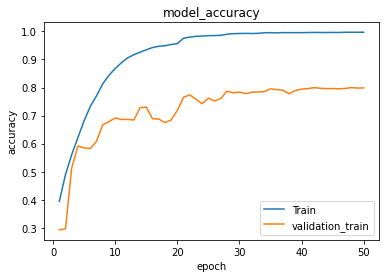

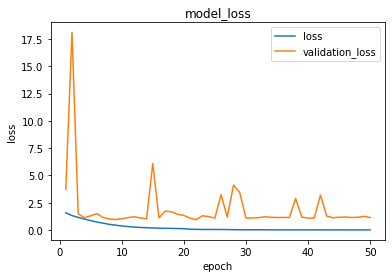

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(dnn_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,dnn_history.history['acc'])
plt.plot(total_epoch,dnn_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,dnn_history.history['loss'])
plt.plot(total_epoch,dnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = dnn_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

array([0, 5, 0, ..., 3, 5, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

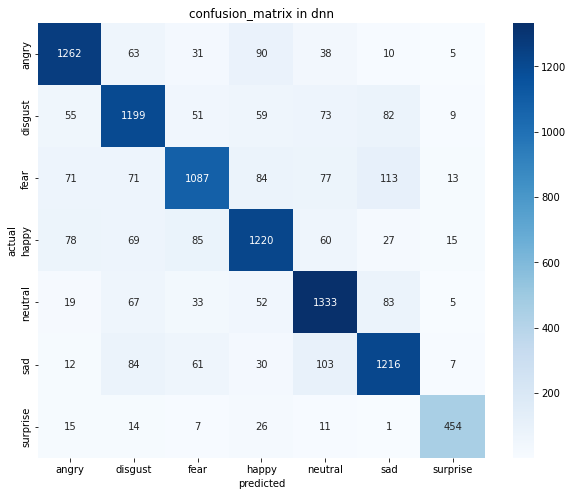

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in dnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1499
           1       0.77      0.78      0.78      1528
           2       0.81      0.71      0.76      1516
           3       0.79      0.78      0.78      1554
           4       0.79      0.83      0.81      1592
           5       0.80      0.80      0.80      1513
           6       0.90      0.86      0.88       528

   micro avg       0.80      0.79      0.80      9730
   macro avg       0.81      0.80      0.81      9730
weighted avg       0.80      0.79      0.80      9730
 samples avg       0.79      0.79      0.79      9730



In [ ]:
# show accuracy in lstm 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.7930113052415211


## predict_data

## save model

In [ ]:
dnn_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/dnn.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/dnn.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

array([0, 5, 0, ..., 3, 5, 1])

# ANN

## Train model

In [ ]:
# Initialising the ANN
ann_model = Sequential()

# Adding the input layer and the first hidden layer
ann_model.add(Dense(units=256,activation="relu", input_shape = (X_train_scalar.shape[1], 1)))
# Adding dropout to prevent overfitting
ann_model.add(Dropout(0.2))

ann_model.add(Dense(units=256,activation="relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(units=128,activation="relu"))
ann_model.add(Dropout(0.2))

# Adding the output layer
ann_model.add(layers.Flatten())
ann_model.add(layers.Dense(256, activation = 'relu'))
ann_model.add(layers.BatchNormalization())
ann_model.add(Dense(units=7,activation="softmax"))

# Compiling the DNN
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2376, 256)         512       
                                                                 
 dropout (Dropout)           (None, 2376, 256)         0         
                                                                 
 dense_1 (Dense)             (None, 2376, 256)         65792     
                                                                 
 dropout_1 (Dropout)         (None, 2376, 256)         0         
                                                                 
 dense_2 (Dense)             (None, 2376, 128)         32896     
                                                                 
 dropout_2 (Dropout)         (None, 2376, 128)         0         
                                                                 
 flatten (Flatten)           (None, 304128)            0

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

ann_history = ann_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 86s 69ms/step - loss: 1.5165 - acc: 0.4148 - f1_model: 0.2661 - recall_model: 0.1755 - precision_model: 0.5969 - val_loss: 1.5008 - val_acc: 0.4277 - val_f1_model: 0.3397 - val_recall_model: 0.2454 - val_precision_model: 0.5670 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 83s 68ms/step - loss: 1.2597 - acc: 0.5202 - f1_model: 0.4355 - recall_model: 0.3200 - precision_model: 0.6988 - val_loss: 1.3190 - val_acc: 0.4992 - val_f1_model: 0.4299 - val_recall_model: 0.3295 - val_precision_model: 0.6302 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 83s 68ms/step - loss: 1.1260 - acc: 0.5791 - f1_model: 0.5177 - recall_model: 0.4041 - precision_model: 0.7322 - val_loss: 1.3933 - val_acc: 0.4845 - val_f1_model: 0.4405 - val_recall_model: 0.3478 - val_precision_model: 0.6092 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 83s 68ms/step - loss: 1.0168 - acc: 0.6216 - f1_model

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = ann_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 4s 12ms/step - loss: 1.3718 - acc: 0.7087 - f1_model: 0.7093 - recall_model: 0.6980 - precision_model: 0.7213
[1.3718109130859375, 0.7087358832359314, 0.7092795372009277, 0.6979508399963379, 0.7213391065597534]
test_loss: 1.3718109130859375
test_accuracy: 0.7087358832359314
test_f1: 0.7092795372009277
test_precision: 0.6979508399963379
test_recall: 0.7213391065597534


In [ ]:
ann_history.history

{'loss': [1.516546607017517,
  1.2597098350524902,
  1.12595534324646,
  1.0168174505233765,
  0.9130575060844421,
  0.8231479525566101,
  0.740558922290802,
  0.6703388690948486,
  0.5958217978477478,
  0.5484186410903931,
  0.4947512745857239,
  0.3655986785888672,
  0.3288441300392151,
  0.2918035686016083,
  0.27167919278144836,
  0.24853548407554626,
  0.233318492770195,
  0.2143823504447937,
  0.196123406291008,
  0.19108252227306366,
  0.17701025307178497,
  0.1592124104499817,
  0.15260444581508636,
  0.11632481217384338,
  0.1024668887257576,
  0.0965292900800705,
  0.0955454409122467,
  0.08778132498264313,
  0.08651428669691086,
  0.08466033637523651,
  0.06558144092559814,
  0.06326773017644882,
  0.06027335673570633,
  0.06050822511315346,
  0.05751554295420647,
  0.05503922700881958,
  0.05027751252055168,
  0.04806200787425041],
 'acc': [0.4147952198982239,
  0.5201963186264038,
  0.5790636539459229,
  0.6215890049934387,
  0.6620330214500427,
  0.6968497633934021,
  0.7

In [ ]:
from sklearn.metrics import roc_auc_score
predition = ann_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 84.21%


## virtualization

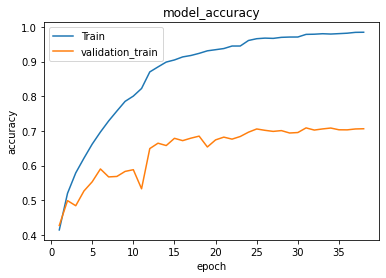

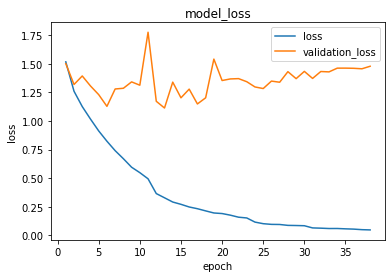

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(ann_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,ann_history.history['acc'])
plt.plot(total_epoch,ann_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,ann_history.history['loss'])
plt.plot(total_epoch,ann_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = ann_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

array([2, 5, 0, ..., 3, 4, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

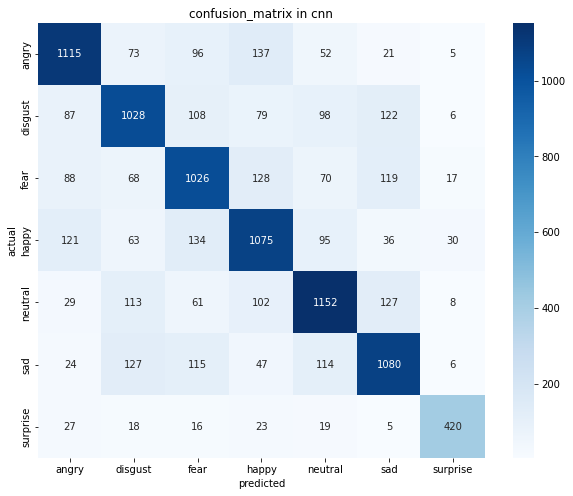

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1499
           1       0.70      0.66      0.68      1528
           2       0.67      0.66      0.67      1516
           3       0.70      0.69      0.69      1554
           4       0.74      0.71      0.72      1592
           5       0.73      0.71      0.72      1513
           6       0.85      0.78      0.82       528

   micro avg       0.72      0.70      0.71      9730
   macro avg       0.73      0.71      0.72      9730
weighted avg       0.72      0.70      0.71      9730
 samples avg       0.70      0.70      0.70      9730



In [ ]:
# show accuracy in ann 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.6985611510791367


## predict_data

## save model

In [ ]:
ann_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/ann_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/ann_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

# CNN_LSTM

## Train model

In [ ]:
cnn_lstm_model = models.Sequential()

cnn_lstm_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (X_train_scalar.shape[1], 1)))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_lstm_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_lstm_model.add(layers.Conv1D(256, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_lstm_model.add(layers.Conv1D(256, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling1D(strides = 2, pool_size = 5, padding = 'same'))

cnn_lstm_model.add(layers.Conv1D(128, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling1D(strides = 2, pool_size = 3, padding = 'same'))

# First layer
cnn_lstm_model.add(LSTM(units=128, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))
# Second layer
cnn_lstm_model.add(LSTM(units=128, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))
# Third layer
cnn_lstm_model.add(LSTM(units=64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))
# Fourth layer
cnn_lstm_model.add(LSTM(units=64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))

# # fifth layer
cnn_lstm_model.add(LSTM(units=64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))

cnn_lstm_model.add(layers.Flatten())
cnn_lstm_model.add(layers.Dense(512, activation = 'relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.Dense(7, activation = "softmax"))

cnn_lstm_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
cnn_lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [ ]:
cnn_lstm_history = cnn_lstm_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 248s 188ms/step - loss: 1.6798 - acc: 0.3434 - f1_model: 0.1994 - recall_model: 0.1341 - precision_model: 0.4481 - val_loss: 1.6252 - val_acc: 0.3972 - val_f1_model: 0.3317 - val_recall_model: 0.2487 - val_precision_model: 0.5103 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 230s 189ms/step - loss: 1.3732 - acc: 0.4631 - f1_model: 0.3846 - recall_model: 0.2809 - precision_model: 0.6292 - val_loss: 1.2690 - val_acc: 0.5109 - val_f1_model: 0.4340 - val_recall_model: 0.3224 - val_precision_model: 0.6798 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 230s 189ms/step - loss: 1.2334 - acc: 0.5183 - f1_model: 0.4570 - recall_model: 0.3467 - precision_model: 0.6852 - val_loss: 1.3935 - val_acc: 0.4521 - val_f1_model: 0.4131 - val_recall_model: 0.3180 - val_precision_model: 0.6003 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 230s 189ms/step - loss: 1.1537 - acc: 0.5480 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_lstm_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 16s 52ms/step - loss: 0.3588 - acc: 0.8988 - f1_model: 0.8997 - recall_model: 0.8943 - precision_model: 0.9053
[0.35875964164733887, 0.8987666964530945, 0.8996848464012146, 0.8942623138427734, 0.9053418040275574]
test_loss: 0.35875964164733887
test_accuracy: 0.8987666964530945
test_f1: 0.8996848464012146
test_precision: 0.8942623138427734
test_recall: 0.9053418040275574


In [ ]:
cnn_lstm_history.history

{'loss': [1.6798065900802612,
  1.3732085227966309,
  1.233428716659546,
  1.1536898612976074,
  1.0892393589019775,
  1.0487229824066162,
  0.9993019104003906,
  0.9594511985778809,
  0.9207677245140076,
  0.8844624757766724,
  0.8421156406402588,
  0.8043702840805054,
  0.7673795223236084,
  0.7308391332626343,
  0.694869339466095,
  0.6628276705741882,
  0.6261895895004272,
  0.5794169902801514,
  0.5531867146492004,
  0.5241482853889465,
  0.49084392189979553,
  0.46168792247772217,
  0.43628379702568054,
  0.4089587926864624,
  0.38786882162094116,
  0.36748644709587097,
  0.35120075941085815,
  0.3330625295639038,
  0.31448987126350403,
  0.3017004132270813,
  0.28536754846572876,
  0.26751279830932617,
  0.26160576939582825,
  0.24705375730991364,
  0.24083276093006134,
  0.2363416999578476,
  0.22502709925174713,
  0.21432533860206604,
  0.20825159549713135,
  0.2028687745332718,
  0.19799593091011047,
  0.19502097368240356,
  0.18469664454460144,
  0.17693275213241577,
  0.172

In [ ]:
from sklearn.metrics import roc_auc_score
predition = cnn_lstm_model.predict(X_test_scalar)
y_pred = np.round(predition)
# print(y_pred)

try:
    auc = roc_auc_score(y_pred, y_test)
    print("AUC: {:.2%}".format (auc))
except ValueError:
    pass

305/305 [==============================] - 15s 48ms/step
AUC: 94.51%


## virtualization

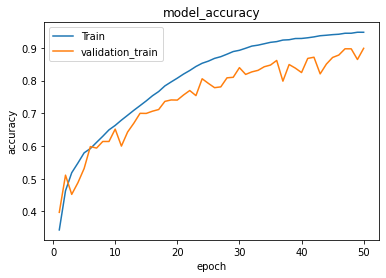

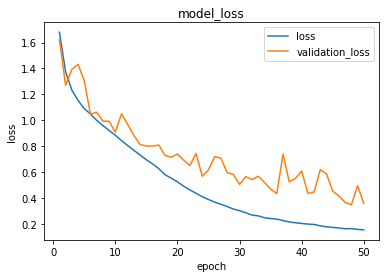

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(cnn_lstm_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_lstm_history.history['acc'])
plt.plot(total_epoch,cnn_lstm_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_lstm_history.history['loss'])
plt.plot(total_epoch,cnn_lstm_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = cnn_lstm_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 15s 49ms/step


array([0, 5, 0, ..., 3, 5, 1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([0, 5, 0, ..., 3, 5, 1])

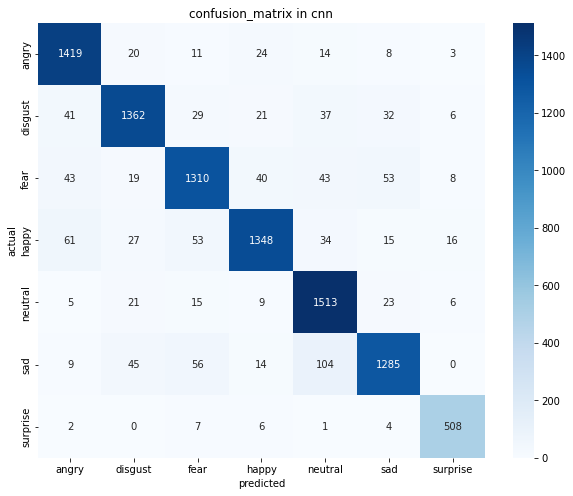

In [ ]:
list_emotion = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
a1 = (1419*2)/((1419+41+43+61+5+9+2)+(1419+20+11+24+14+8+3))
a2 = (1362*2)/((1362+20+19+27+21+45+0)+(1362+41+29+21+37+32+6))
a3 = (1310*2)/((1310+11+29+53+15+56+7)+(1310+43+19+40+43+53+8))
a4 = (1348*2)/((1348+24+21+40+9+14+6)+(1348+61+27+53+34+15+16))
a5 = (1513*2)/((1513+14+37+43+34+104+1)+(1513+5+21+15+9+23+6))
a6 = (1285*2)/((1285+8+32+53+15+23+4)+(1285+9+45+56+14+104+0))
a7 = (508*2)/((508+3+6+8+16+6+0)+(508+2+0+7+6+1+4))

print("a1",a1)
print("a2",a2)
print("a3",a3)
print("a4",a4)
print("a5",a5)
print("a6",a6)
print("a7",a7)


(a1+a2+a3+a4+a5+a6+a7)/7



a1 0.9217278337122442
a2 0.9013898080741231
a3 0.8742075408742075
a4 0.8938992042440318
a5 0.9065308568004793
a6 0.876235935901807
a7 0.9451162790697675


0.9027296369538087

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1499
           1       0.92      0.89      0.90      1528
           2       0.89      0.86      0.87      1516
           3       0.93      0.86      0.89      1554
           4       0.88      0.95      0.91      1592
           5       0.91      0.84      0.88      1513
           6       0.93      0.96      0.94       528

   micro avg       0.91      0.89      0.90      9730
   macro avg       0.91      0.90      0.90      9730
weighted avg       0.91      0.89      0.90      9730
 samples avg       0.89      0.89      0.89      9730



In [ ]:
# show accuracy in ann 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.8939362795477903


# Ensemble Learnning

              precision    recall  f1-score   support

       angry       0.89      0.92      0.90      1499
     disgust       0.86      0.89      0.87      1528
        fear       0.87      0.85      0.86      1516
       happy       0.90      0.87      0.88      1554
     neutral       0.91      0.90      0.91      1592
         sad       0.88      0.89      0.89      1513
    surprise       0.95      0.94      0.94       528

    accuracy                           0.89      9730
   macro avg       0.90      0.89      0.89      9730
weighted avg       0.89      0.89      0.89      9730

accuracy_score_VotingClassifier(estimators=[('MLPClassifier_200', MLPClassifier()),
                             ('MLPClassifier_400', MLPClassifier(max_iter=400)),
                             ('MLPClassifier_600', MLPClassifier(max_iter=600)),
                             ('MLPClassifier_800', MLPClassifier(max_iter=800)),
                             ('MLPClassifier_1000',
                        

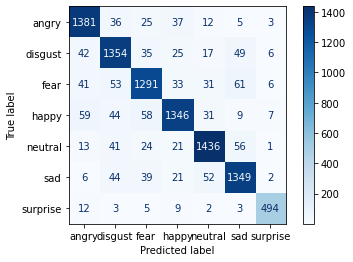

time to finish all process = 10:31:35.228964
cross_validation =  hard_voting [0.86613566 0.87358684 0.85842754 0.86510791 0.87358684 0.86459404
 0.87127441 0.86587873 0.8612182  0.86533025]


In [ ]:
list_model_vote = []
list_results = []
list_name = []
scalar_use = StandardScaler()
models = dict()

list_model_vote.append(('MLPClassifier_200', MLPClassifier(max_iter=200)))
list_model_vote.append(('MLPClassifier_400', MLPClassifier(max_iter=400)))
list_model_vote.append(('MLPClassifier_600', MLPClassifier(max_iter=600)))
list_model_vote.append(('MLPClassifier_800', MLPClassifier(max_iter=800)))
list_model_vote.append(('MLPClassifier_1000', MLPClassifier(max_iter=1000)))

models['hard_voting'] = VotingClassifier(estimators=list_model_vote, voting='hard')
# models['soft_voting'] = VotingClassifier(estimators=list_model_vote, voting='soft')
# models['stacking'] = StackingClassifier(estimators=list_model_vote)


for name, model in models.items():
  start_time = datetime.now()
  pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
  pipe.fit(X_train, y_train)
  # predict y value
  y_pred_model =pipe.predict(X_test)
  # classification_report
  print(classification_report(y_test, y_pred_model))
  # accuracy score
  print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
  print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
  # confusion_matrix
  plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
  plt.show()

  finish_time = datetime.now()
  print("time to finish all process =",finish_time-start_time)
  list_results.append(cv_results)
  list_name.append(name)
  print("cross_validation = ",name,cv_results)
pyplot.boxplot(list_results, labels=list_name, showmeans=True)
pyplot.show()

              precision    recall  f1-score   support

       angry       0.91      0.93      0.92      1499
     disgust       0.89      0.88      0.88      1528
        fear       0.91      0.85      0.88      1516
       happy       0.88      0.88      0.88      1554
     neutral       0.92      0.90      0.91      1592
         sad       0.87      0.92      0.90      1513
    surprise       0.91      0.96      0.93       528

    accuracy                           0.90      9730
   macro avg       0.90      0.90      0.90      9730
weighted avg       0.90      0.90      0.90      9730

accuracy_score_VotingClassifier(estimators=[('MLPClassifier_200', MLPClassifier()),
                             ('MLPClassifier_400', MLPClassifier(max_iter=400)),
                             ('MLPClassifier_600', MLPClassifier(max_iter=600)),
                             ('MLPClassifier_800', MLPClassifier(max_iter=800)),
                             ('MLPClassifier_1000',
                        

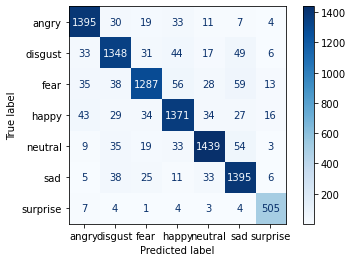

time to finish all process = 10:55:07.631876
cross_validation =  soft_voting [0.86151079 0.87846865 0.87487153 0.86793422 0.89157246 0.87512847
 0.8663926  0.87307297 0.86841429 0.87561038]


In [ ]:
list_model_vote = []
list_results = []
list_name = []
scalar_use = StandardScaler()
models = dict()

list_model_vote.append(('MLPClassifier_200', MLPClassifier(max_iter=200)))
list_model_vote.append(('MLPClassifier_400', MLPClassifier(max_iter=400)))
list_model_vote.append(('MLPClassifier_600', MLPClassifier(max_iter=600)))
list_model_vote.append(('MLPClassifier_800', MLPClassifier(max_iter=800)))
list_model_vote.append(('MLPClassifier_1000', MLPClassifier(max_iter=1000)))

# models['hard_voting'] = VotingClassifier(estimators=list_model_vote, voting='hard')
models['soft_voting'] = VotingClassifier(estimators=list_model_vote, voting='soft')
models['stacking'] = StackingClassifier(estimators=list_model_vote)


for name, model in models.items():
  start_time = datetime.now()
  pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
  pipe.fit(X_train, y_train)
  # predict y value
  y_pred_model =pipe.predict(X_test)
  # classification_report
  print(classification_report(y_test, y_pred_model))
  # accuracy score
  print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
  print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
  # confusion_matrix
  plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
  plt.show()

  finish_time = datetime.now()
  print("time to finish all process =",finish_time-start_time)
  list_results.append(cv_results)
  list_name.append(name)
  print("cross_validation = ",name,cv_results)
pyplot.boxplot(list_results, labels=list_name, showmeans=True)
pyplot.show()

# Result

In [7]:
list_name = []
list_accuracy = []
list_time = []


list_name.append("DecisionTreeClassifier")
list_accuracy.append(49.26)
list_time.append(29)

list_name.append("LogisticRegression")
list_accuracy.append(43.36)
list_time.append(13)

list_name.append("RandomForestClassifier")
list_accuracy.append(80.82)
list_time.append(37)

list_name.append("KNeighborsClassifier")
list_accuracy.append(76.49)
list_time.append(6)

list_name.append("SVC")
list_accuracy.append(61.02)
list_time.append(727)

list_name.append("GaussianNB")
list_accuracy.append(17.28)
list_time.append(1)

list_name.append("XGBClassifier")
list_accuracy.append(49.21)
list_time.append(432)

list_name.append("SGDClassifier")
list_accuracy.append(37.27)
list_time.append(82)

list_name.append("MLPClassifier")
list_accuracy.append(83.84)
list_time.append(160)

list_name.append("voting classification with hard")
list_accuracy.append(88.91)
list_time.append(631)

list_name.append("voting classification with soft")
list_accuracy.append(89.82)
list_time.append(655)

list_name.append("convolutional_neural_networks")
list_accuracy.append(97.44)
list_time.append(233)

list_name.append("long_short_term_memory")
list_accuracy.append(94.99)
list_time.append(480)

list_name.append("gated_recurrent_unit")
list_accuracy.append(95.03)
list_time.append(421)

list_name.append("deep_neural_network")
list_accuracy.append(79.30)
list_time.append(174)

list_name.append("artificial_neural_network")
list_accuracy.append(69.85)
list_time.append(69)

list_name.append("cnn_and_lstm")
list_accuracy.append(89.39)
list_time.append(192)

df_result_ml = pd.DataFrame({'model': list_name,'accuracy': list_accuracy,'time':list_time})
df_result_ml

,model,accuracy,time
0,DecisionTreeClassifier,49.26,29
1,LogisticRegression,43.36,13
2,RandomForestClassifier,80.82,37
3,KNeighborsClassifier,76.49,6
4,SVC,61.02,727
5,GaussianNB,17.28,1
6,XGBClassifier,49.21,432
7,SGDClassifier,37.27,82
8,MLPClassifier,83.84,160
9,voting classification with hard,88.91,631


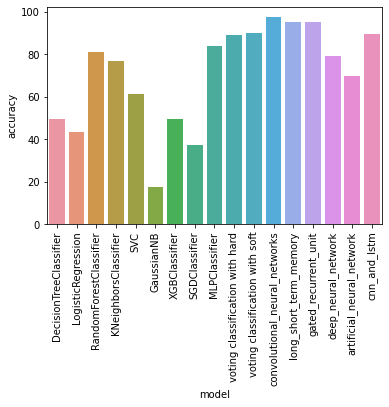

In [8]:
# sns.barplot(data=df_result_ml, x="name", y="accuracy", errorbar="std")
sns.barplot(data=df_result_ml, x="model", y="accuracy")
plt.xticks(rotation=90)
pyplot.show()


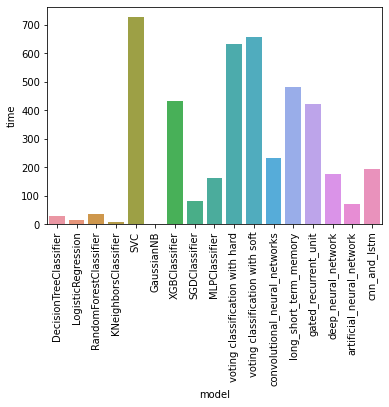

In [9]:
# sns.barplot(data=df_result_ml, x="name", y="accuracy", errorbar="std")
sns.barplot(data=df_result_ml, x="model", y="time")
plt.xticks(rotation=90)
pyplot.show()
